In [240]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [195]:
def load_df(exp_name, data_type):
    df = pd.read_csv(f'yolov5/runs/{data_type}/{exp_name}/results.csv')
    df.columns = df.columns.str.strip()
    if data_type == 'val':  # Actually it is test
        df['Class'] = df['Class'].str.replace('_', ' ')
    return df

In [164]:
def plot_exp_loss_graphs(df, exp_num, data_type):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'Experiment {exp_num} - {"Training" if data_type == "train" else "Validation"} Loss Graphs', y=1, size=14)
    ax1.plot(df[f'{data_type}/box_loss'])
    ax2.plot(df[f'{data_type}/obj_loss'])
    ax3.plot(df[f'{data_type}/cls_loss'])
    ax1.set_xlabel('epoch')
    ax2.set_xlabel('epoch')
    ax3.set_xlabel('epoch')
    ax1.set_title('Box loss')
    ax2.set_title('Obj loss')
    ax3.set_title('Cls loss')
    
def plot_exp_matrics_graphs(df, exp_num):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'Experiment {exp_num} - Matrics Graphs', y=1, size=14)
    ax1.plot(df['metrics/precision'])
    ax2.plot(df['metrics/recall'])
    ax3.plot(df['metrics/mAP_0.5'])
    ax4.plot(df['metrics/mAP_0.5:0.95'])
    ax1.set_xlabel('epoch')
    ax2.set_xlabel('epoch')
    ax3.set_xlabel('epoch')
    ax4.set_xlabel('epoch')
    ax1.set_title('Precision')
    ax2.set_title('Recall')
    ax3.set_title('mAP 0.5')
    ax4.set_title('mAP 0.5:0.95')

In [179]:
def plot_all_loss_graphs(dfs, data_type):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'All Experiment - {"Training" if data_type == "train" else "Validation"} Loss Graphs', y=1, size=14)
    for i, df in enumerate(dfs):
        label = f"Experiment {i + 1}"
        ax1.plot(df[f'{data_type}/box_loss'], label=label)
        ax2.plot(df[f'{data_type}/obj_loss'])
        ax3.plot(df[f'{data_type}/cls_loss'])
    fig.legend(bbox_to_anchor=(1.12, 0.95))
    ax1.set_xlabel('epoch')
    ax2.set_xlabel('epoch')
    ax3.set_xlabel('epoch')
    ax1.set_title('Box loss')
    ax2.set_title('Obj loss')
    ax3.set_title('Cls loss')
    
def plot_all_matrics_graphs(dfs):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'All Experiments - Matrics Graphs', y=1, size=14)
    
    for i, df in enumerate(dfs):
        label = f"Experiment {i + 1}"
        ax1.plot(df['metrics/precision'], label=label)
        ax2.plot(df['metrics/recall'])
        ax3.plot(df['metrics/mAP_0.5'])
        ax4.plot(df['metrics/mAP_0.5:0.95'])
    fig.legend(bbox_to_anchor=(1.12, 0.95))
    ax1.set_xlabel('epoch')
    ax2.set_xlabel('epoch')
    ax3.set_xlabel('epoch')
    ax4.set_xlabel('epoch')
    ax1.set_title('Precision')
    ax2.set_title('Recall')
    ax3.set_title('mAP 0.5')
    ax4.set_title('mAP 0.5:0.95')

In [235]:
def plot_tests_metric(test_dfs, metric):
    values = []
    names = []
    for i, df in enumerate(test_dfs):
        values.append(df[metric][0])
        names.append(f"Exp. {i+1}")
        
    plt.bar(names, values)
    plt.title(f"Mean {metric[1:] if metric.startswith('mAP') else metric} - Test Reults")
    plt.show()

In [241]:
def show_confusion_matrix(exp_name):
    matrix = Image.open(f"yolov5/runs/val/{exp_name}/confusion_matrix.png")
    return matrix

In [197]:
experiment_names = {1: 'small_SGD',
                    2: 'small_AdamW',
                    3: 'small_Adam',
                    4: 'large_SGD',
                    5: 'small_SGD_augmented_with_val', 
                    6: 'large_SGD_augmented_with_val'}

# Expreiment 1
### Using Small Model And SGD Optimizer

In [198]:
df_exp1 = load_df(experiment_names[1], 'train')

In [4]:
df_exp1

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.088091,0.042602,0.055025,0.70119,0.11185,0.034480,0.009848,0.064607,0.028724,0.045349,0.070600,0.003267,0.003267
1,1,0.062992,0.032314,0.044257,0.55912,0.21983,0.079672,0.028428,0.060436,0.015384,0.038484,0.040535,0.006535,0.006535
2,2,0.060796,0.026807,0.040854,0.40949,0.39073,0.146760,0.041173,0.050920,0.014697,0.037365,0.010403,0.009737,0.009737
3,3,0.054306,0.023055,0.036742,0.63083,0.43090,0.258930,0.108410,0.050897,0.012805,0.032021,0.009703,0.009703,0.009703
4,4,0.046715,0.021386,0.033610,0.90117,0.25381,0.376960,0.201510,0.042245,0.011799,0.029113,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.011018,0.009633,0.002540,0.90774,0.85957,0.907980,0.807440,0.010524,0.006471,0.013219,0.000694,0.000694,0.000694
96,96,0.010891,0.009494,0.002139,0.91457,0.86394,0.897510,0.800180,0.010280,0.006333,0.014037,0.000595,0.000595,0.000595
97,97,0.011408,0.009887,0.002384,0.92175,0.86536,0.898140,0.797910,0.010320,0.006299,0.015190,0.000496,0.000496,0.000496
98,98,0.011268,0.009841,0.002398,0.91924,0.86704,0.898210,0.806040,0.010264,0.006215,0.015302,0.000397,0.000397,0.000397


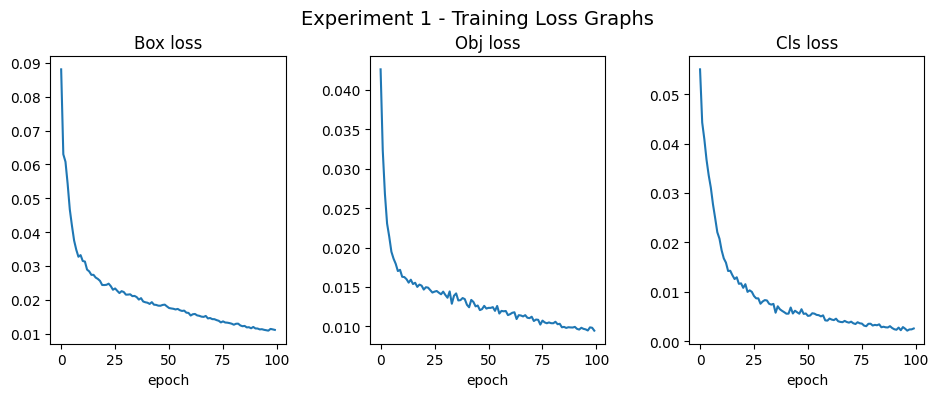

In [66]:
plot_exp_loss_graphs(df_exp1, 1, 'train')

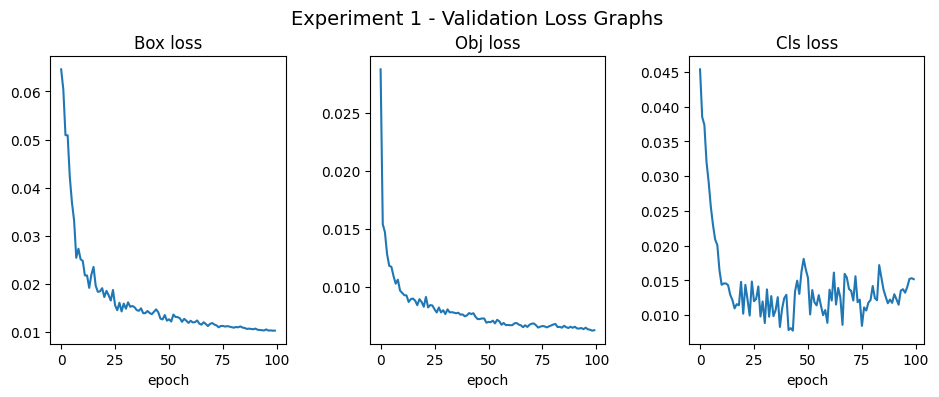

In [67]:
plot_exp_loss_graphs(df_exp1, 1, 'val')

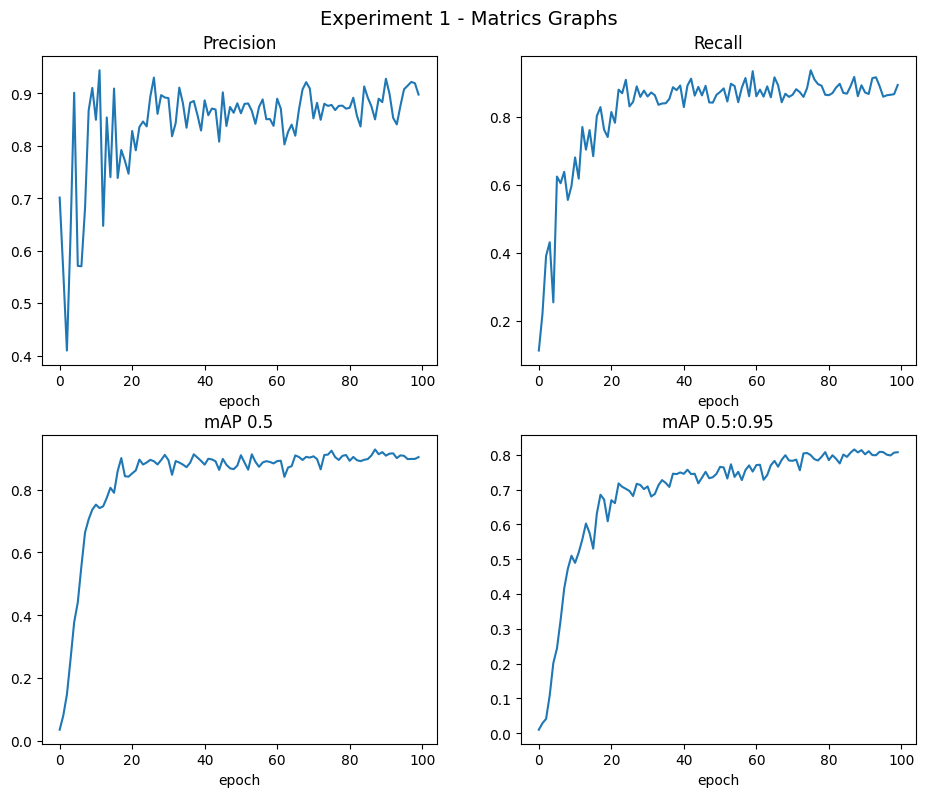

In [85]:
plot_exp_matrics_graphs(df_exp1, 1)

In [206]:
df_test1 = load_df(experiment_names[1], 'val')
df_test1

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.947440,0.692715,0.735246,0.647560
1,Right Scissors,199,42,0.889198,0.955430,0.950396,0.840107
2,Left Scissors,199,1,1.000000,0.000000,0.002551,0.000255
3,Right Needle driver,199,137,0.943744,0.897810,0.982593,0.904270
4,Left Needle driver,199,10,0.971306,0.500000,0.502849,0.401404
5,Left Forceps,199,62,0.981638,0.983871,0.988862,0.862433
6,Right Empty,199,20,0.900798,0.550000,0.744381,0.644983
7,Left Empty,199,126,0.945397,0.961895,0.975087,0.879467


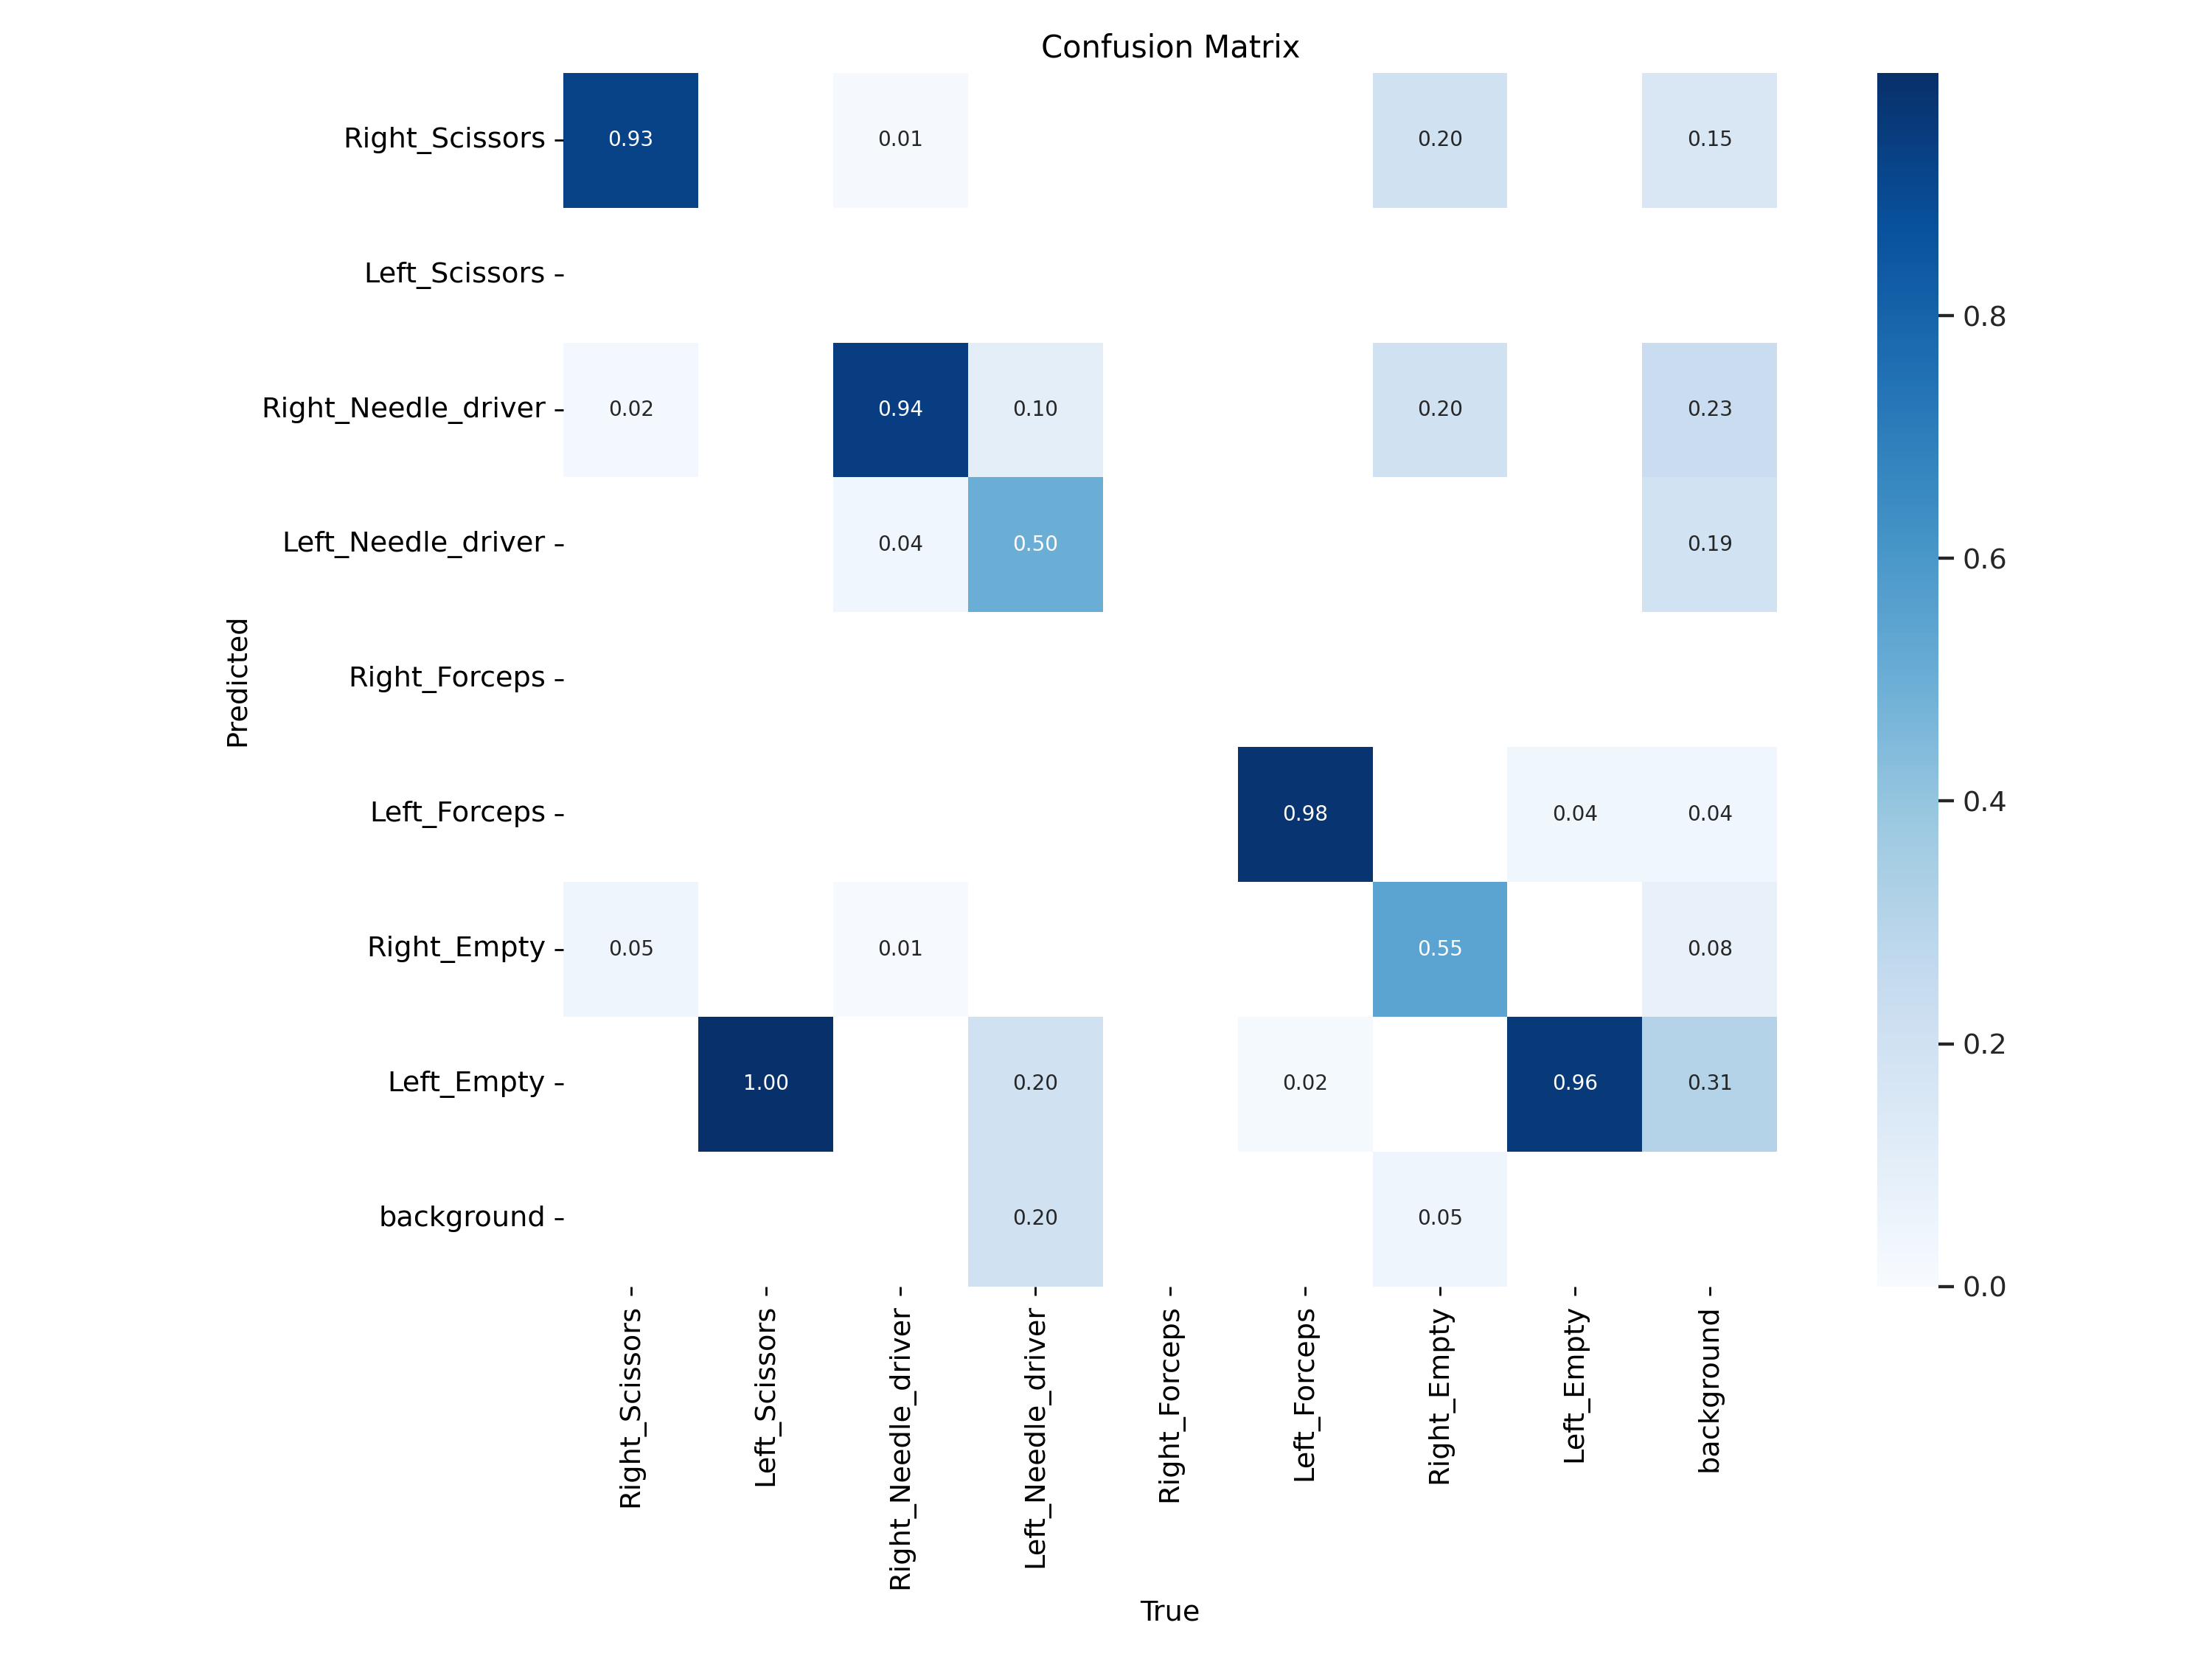

In [242]:
show_confusion_matrix(experiment_names[1])

# Expreiment 2
### Using Small Model And AdamW Optimizer

In [200]:
df_exp2 = load_df(experiment_names[2], 'train')

In [89]:
df_exp2

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.063394,0.035426,0.043782,0.004600,0.28153,0.003887,0.000791,0.076760,1.305300,0.069758,0.070600,0.003267,0.003267
1,1,0.050242,0.028105,0.038287,0.086241,0.69753,0.132350,0.058525,0.069377,0.816400,0.045065,0.040535,0.006535,0.006535
2,2,0.046813,0.028525,0.034275,0.539500,0.32107,0.053603,0.012588,0.065654,0.297920,0.041454,0.010403,0.009737,0.009737
3,3,0.045597,0.026886,0.033263,0.568720,0.11773,0.048110,0.013438,0.054066,0.129980,0.035640,0.009703,0.009703,0.009703
4,4,0.040753,0.025435,0.031806,0.625270,0.30027,0.189410,0.066704,0.048154,0.053038,0.032310,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.013518,0.011644,0.004025,0.796870,0.91529,0.877250,0.740360,0.011710,0.007534,0.014453,0.000694,0.000694,0.000694
96,96,0.013614,0.011666,0.004182,0.844890,0.84952,0.868670,0.743590,0.011486,0.007403,0.017194,0.000595,0.000595,0.000595
97,97,0.014153,0.012185,0.004635,0.842630,0.84974,0.874050,0.743570,0.011539,0.007397,0.019195,0.000496,0.000496,0.000496
98,98,0.013724,0.011878,0.003940,0.886500,0.83410,0.878260,0.753400,0.011552,0.007399,0.018750,0.000397,0.000397,0.000397


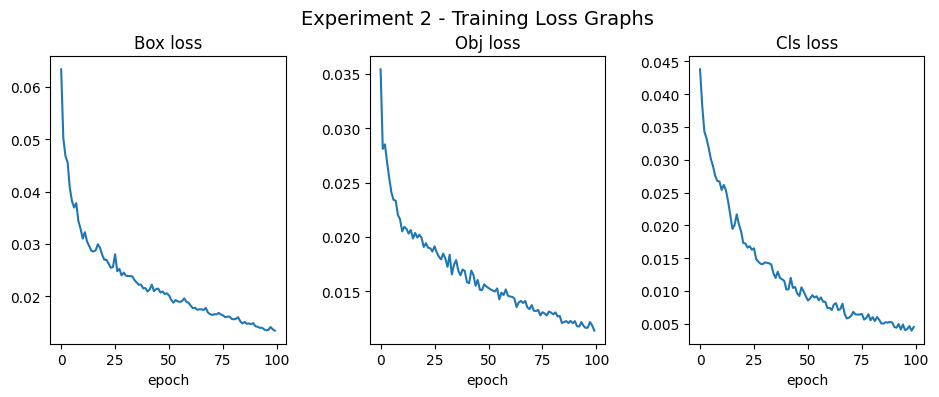

In [92]:
plot_exp_loss_graphs(df_exp2, 2, 'train')

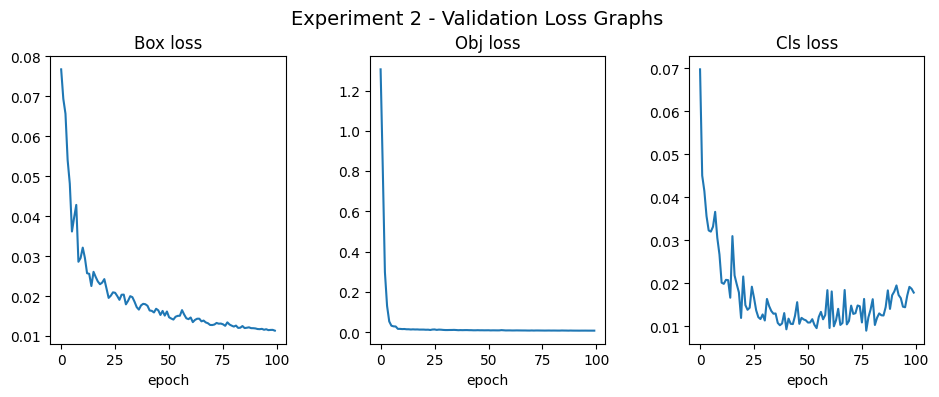

In [93]:
plot_exp_loss_graphs(df_exp2, 2, 'val')

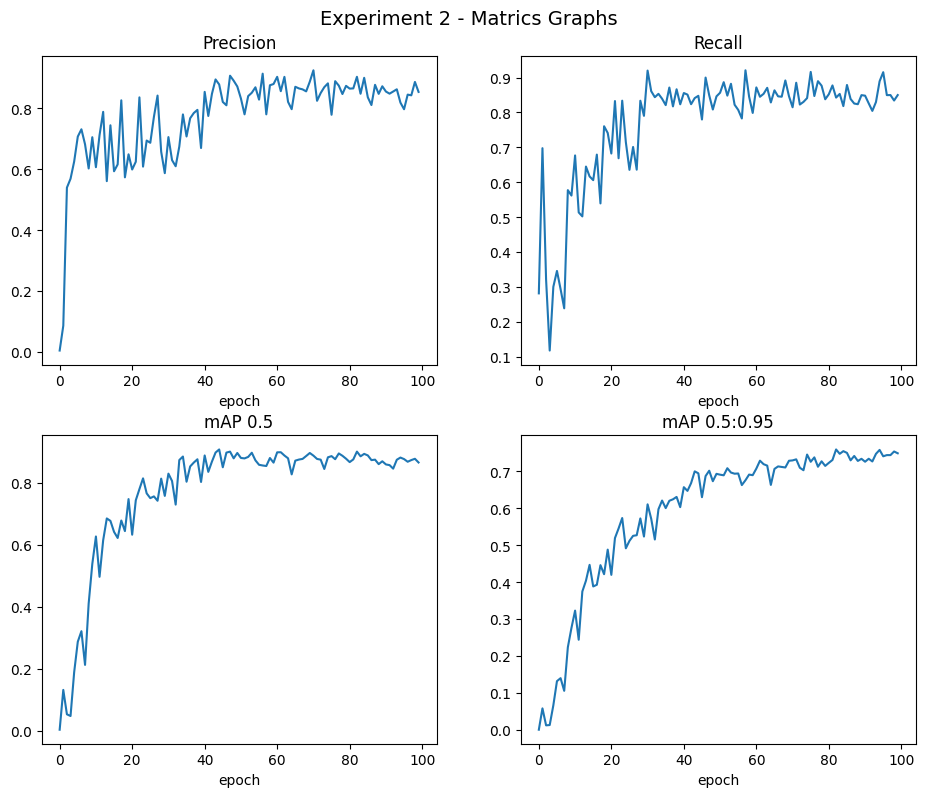

In [94]:
plot_exp_matrics_graphs(df_exp2, 2)

In [207]:
df_test2 = load_df(experiment_names[2], 'val')
df_test2

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.946584,0.688617,0.727392,0.593235
1,Right Scissors,199,42,0.881020,1.000000,0.951892,0.797308
2,Left Scissors,199,1,1.000000,0.000000,0.000000,0.000000
3,Right Needle driver,199,137,0.953883,0.905863,0.986233,0.852440
4,Left Needle driver,199,10,0.956715,0.500000,0.498303,0.254847
5,Left Forceps,199,62,0.899400,0.951613,0.958195,0.814503
6,Right Empty,199,20,1.000000,0.518398,0.741641,0.600361
7,Left Empty,199,126,0.935070,0.944444,0.955482,0.833186


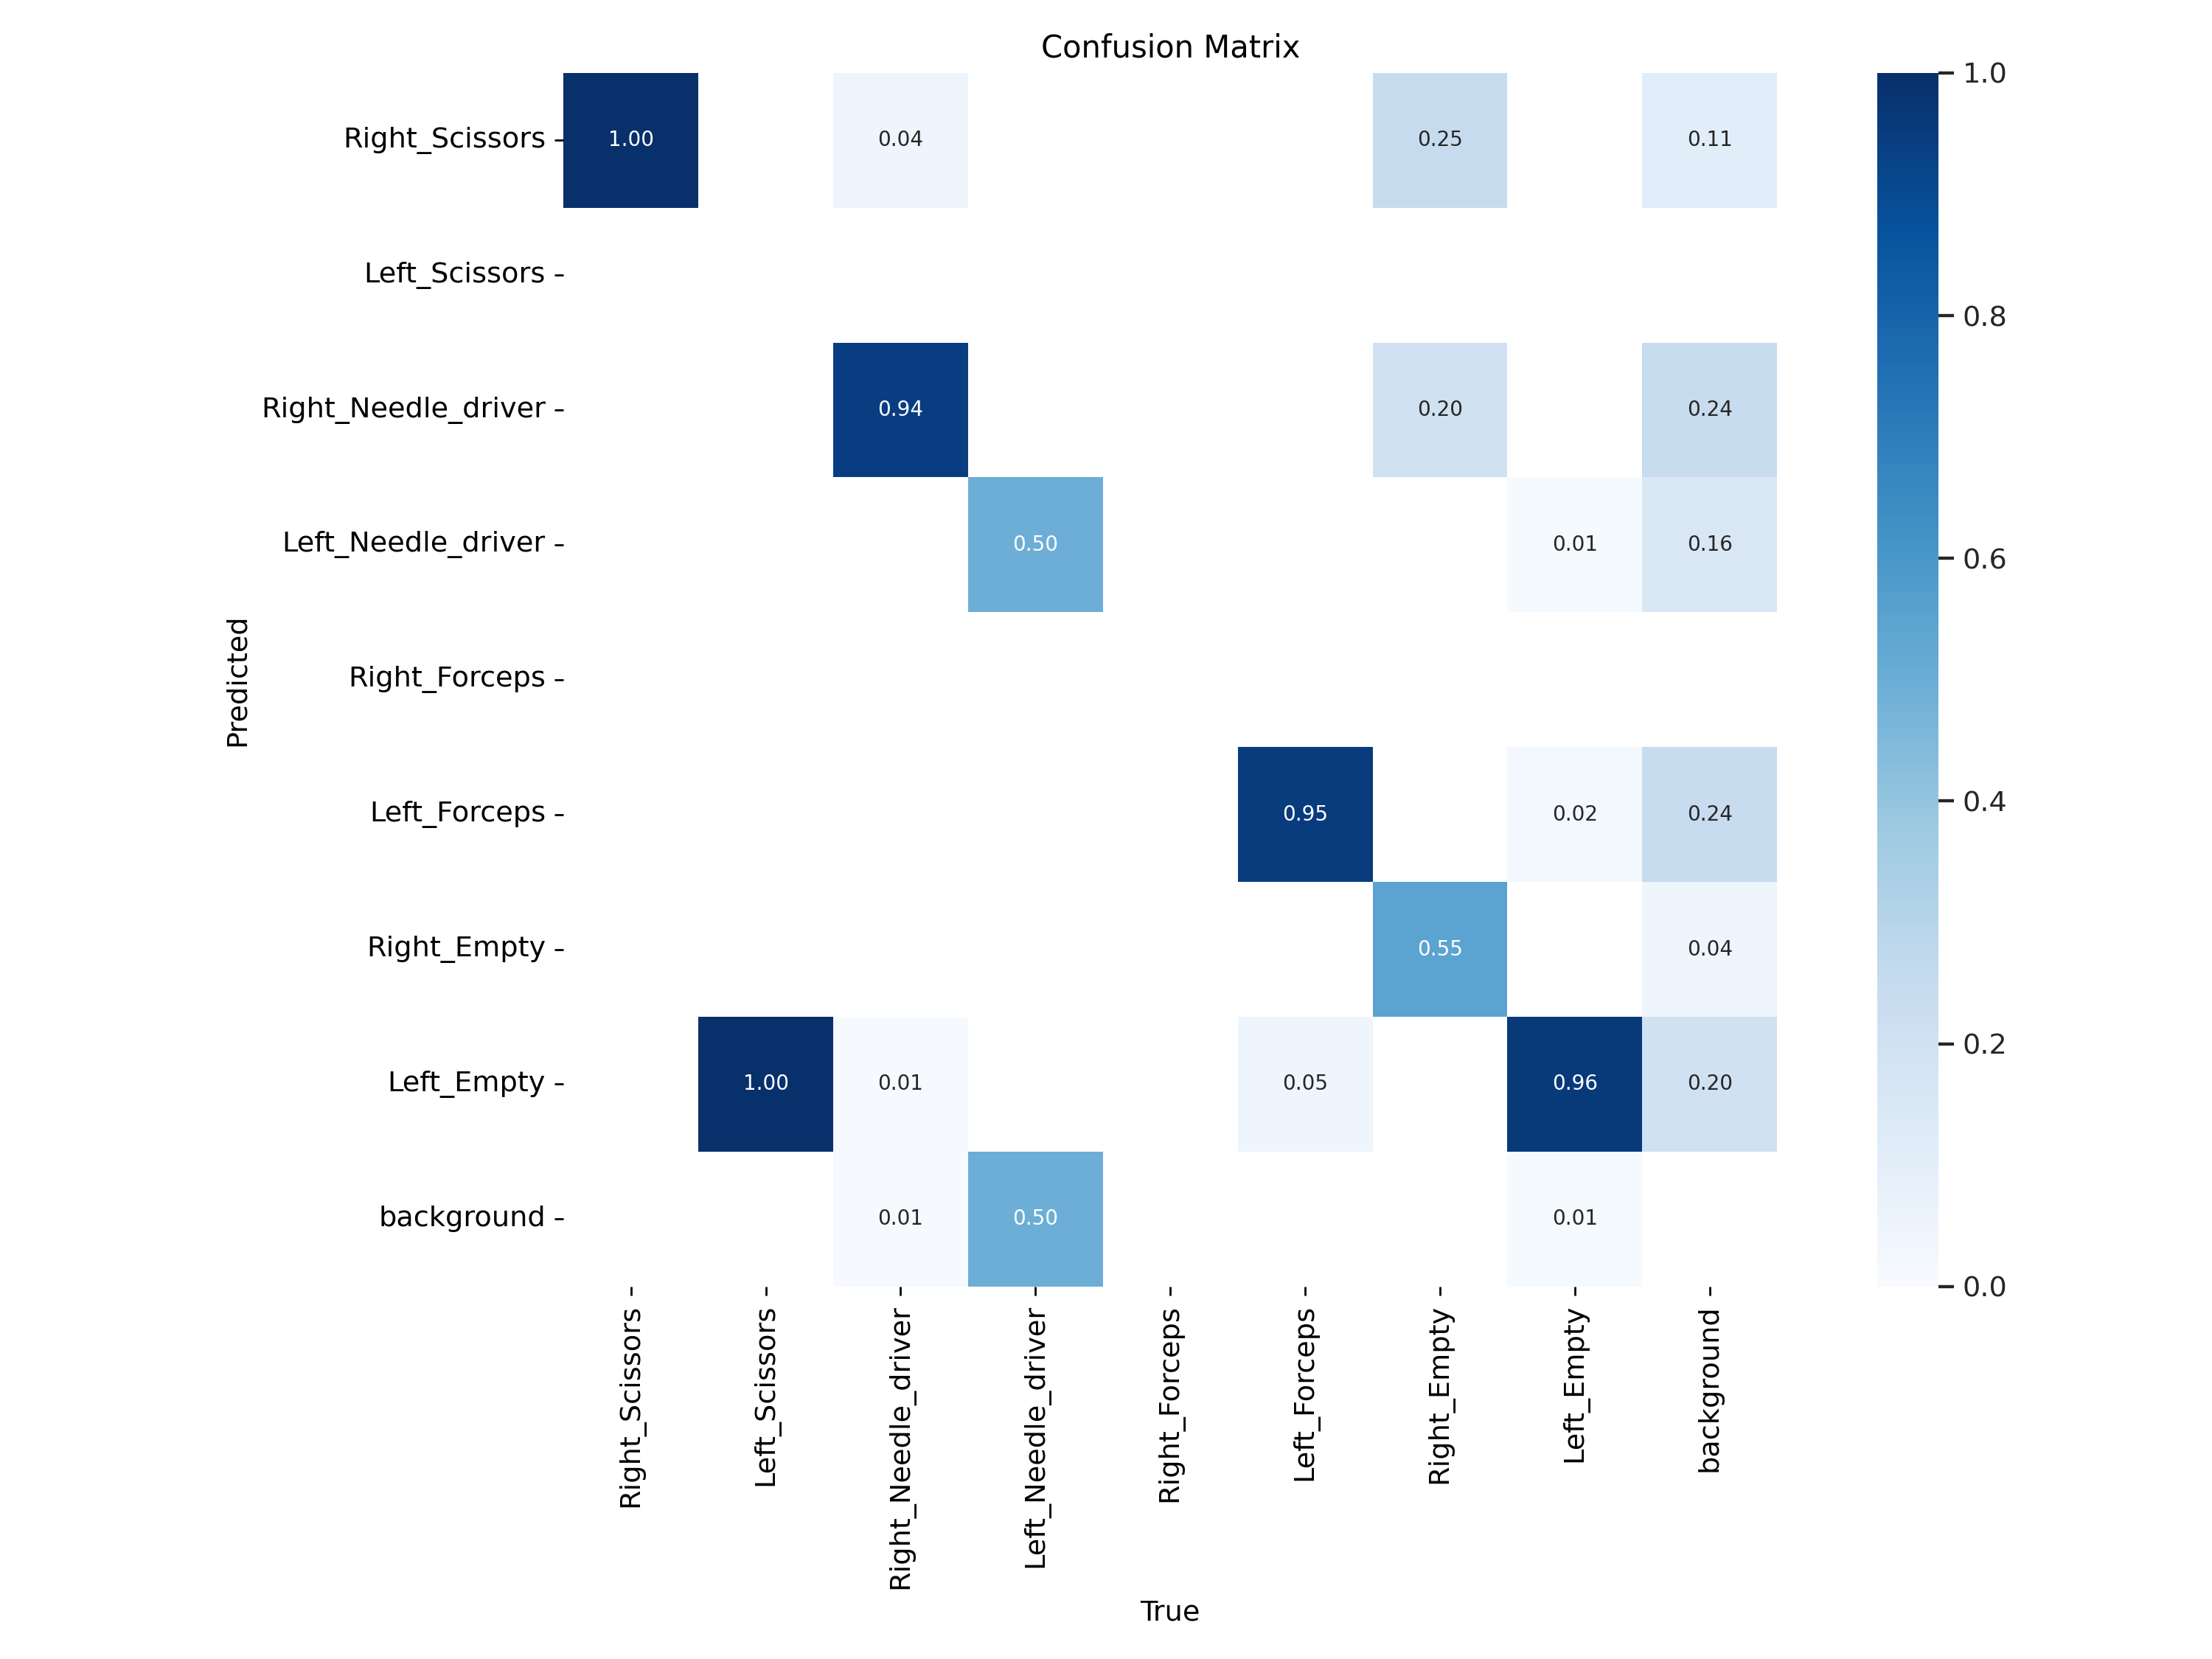

In [243]:
show_confusion_matrix(experiment_names[2])

# Expreiment 3
### Using Small Model And Adam Optimizer

In [201]:
df_exp3 = load_df(experiment_names[3], 'train')

In [202]:
df_exp3

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.063405,0.036136,0.043737,0.179260,0.266550,0.015097,0.002882,0.071357,1.085100,0.063557,0.070600,0.003267,0.003267
1,1,0.052296,0.028224,0.037950,0.000285,0.117540,0.000251,0.000051,0.072012,7.625400,0.170000,0.040535,0.006535,0.006535
2,2,0.046357,0.027288,0.033739,0.002434,0.182410,0.002209,0.000527,0.069077,0.516790,0.118740,0.010403,0.009737,0.009737
3,3,0.044973,0.027160,0.032445,0.542010,0.048027,0.040508,0.009998,0.079921,0.051732,0.053691,0.009703,0.009703,0.009703
4,4,0.040787,0.026047,0.032252,0.663990,0.129560,0.103170,0.040979,0.060740,0.033389,0.052231,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.016132,0.013252,0.005590,0.841800,0.825530,0.860980,0.716550,0.012795,0.008048,0.017160,0.000694,0.000694,0.000694
96,96,0.015677,0.013133,0.005481,0.882160,0.804140,0.864390,0.731640,0.012697,0.007748,0.014886,0.000595,0.000595,0.000595
97,97,0.015753,0.013279,0.006336,0.929620,0.783260,0.860030,0.737410,0.012280,0.007586,0.018002,0.000496,0.000496,0.000496
98,98,0.015663,0.013195,0.004923,0.890000,0.795350,0.864630,0.735060,0.012115,0.007693,0.016534,0.000397,0.000397,0.000397


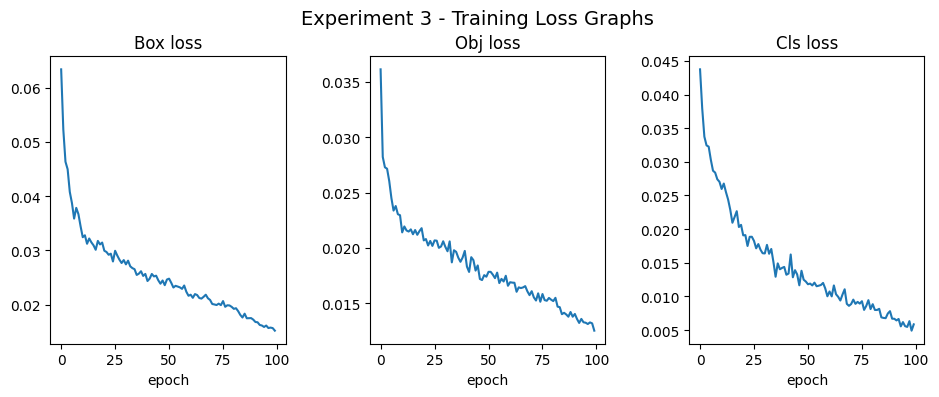

In [101]:
plot_exp_loss_graphs(df_exp3, 3, 'train')

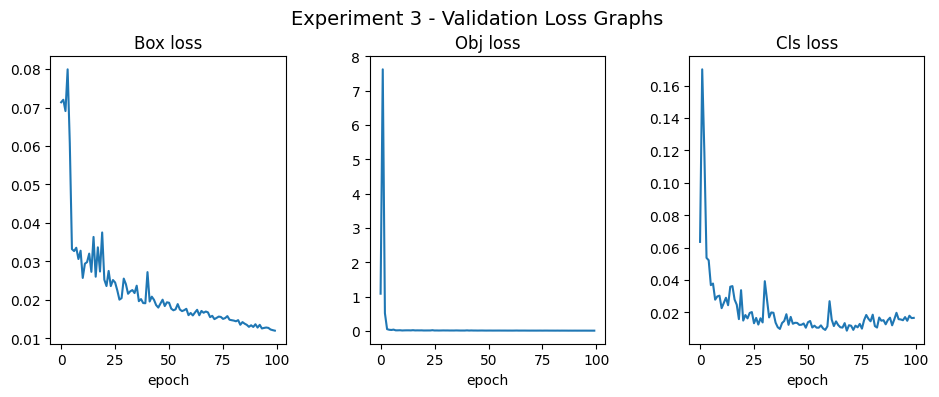

In [102]:
plot_exp_loss_graphs(df_exp3, 3, 'val')

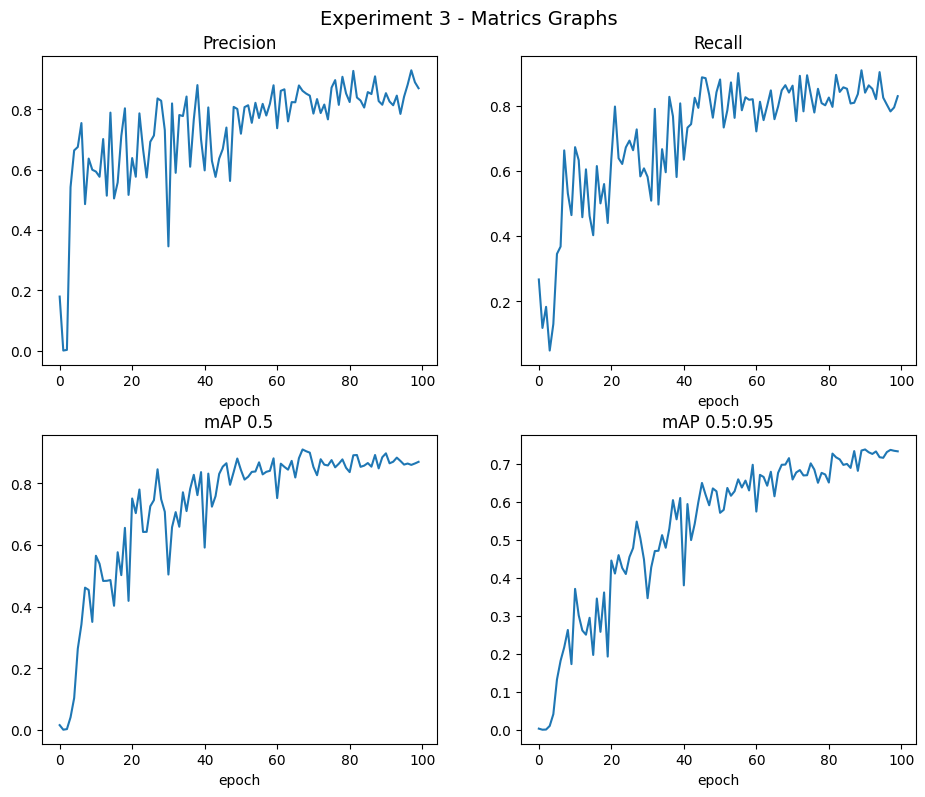

In [103]:
plot_exp_matrics_graphs(df_exp3, 3)

In [208]:
df_test3 = load_df(experiment_names[3], 'val')
df_test3

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.927241,0.714935,0.735823,0.587296
1,Right Scissors,199,42,0.850998,0.951896,0.944563,0.737958
2,Left Scissors,199,1,1.000000,0.000000,0.000000,0.000000
3,Right Needle driver,199,137,0.949155,0.953838,0.983716,0.786036
4,Left Needle driver,199,10,0.953350,0.500000,0.498065,0.354327
5,Left Forceps,199,62,0.870837,0.978754,0.988763,0.823394
6,Right Empty,199,20,0.927778,0.650000,0.752408,0.589733
7,Left Empty,199,126,0.938568,0.970059,0.983245,0.819626


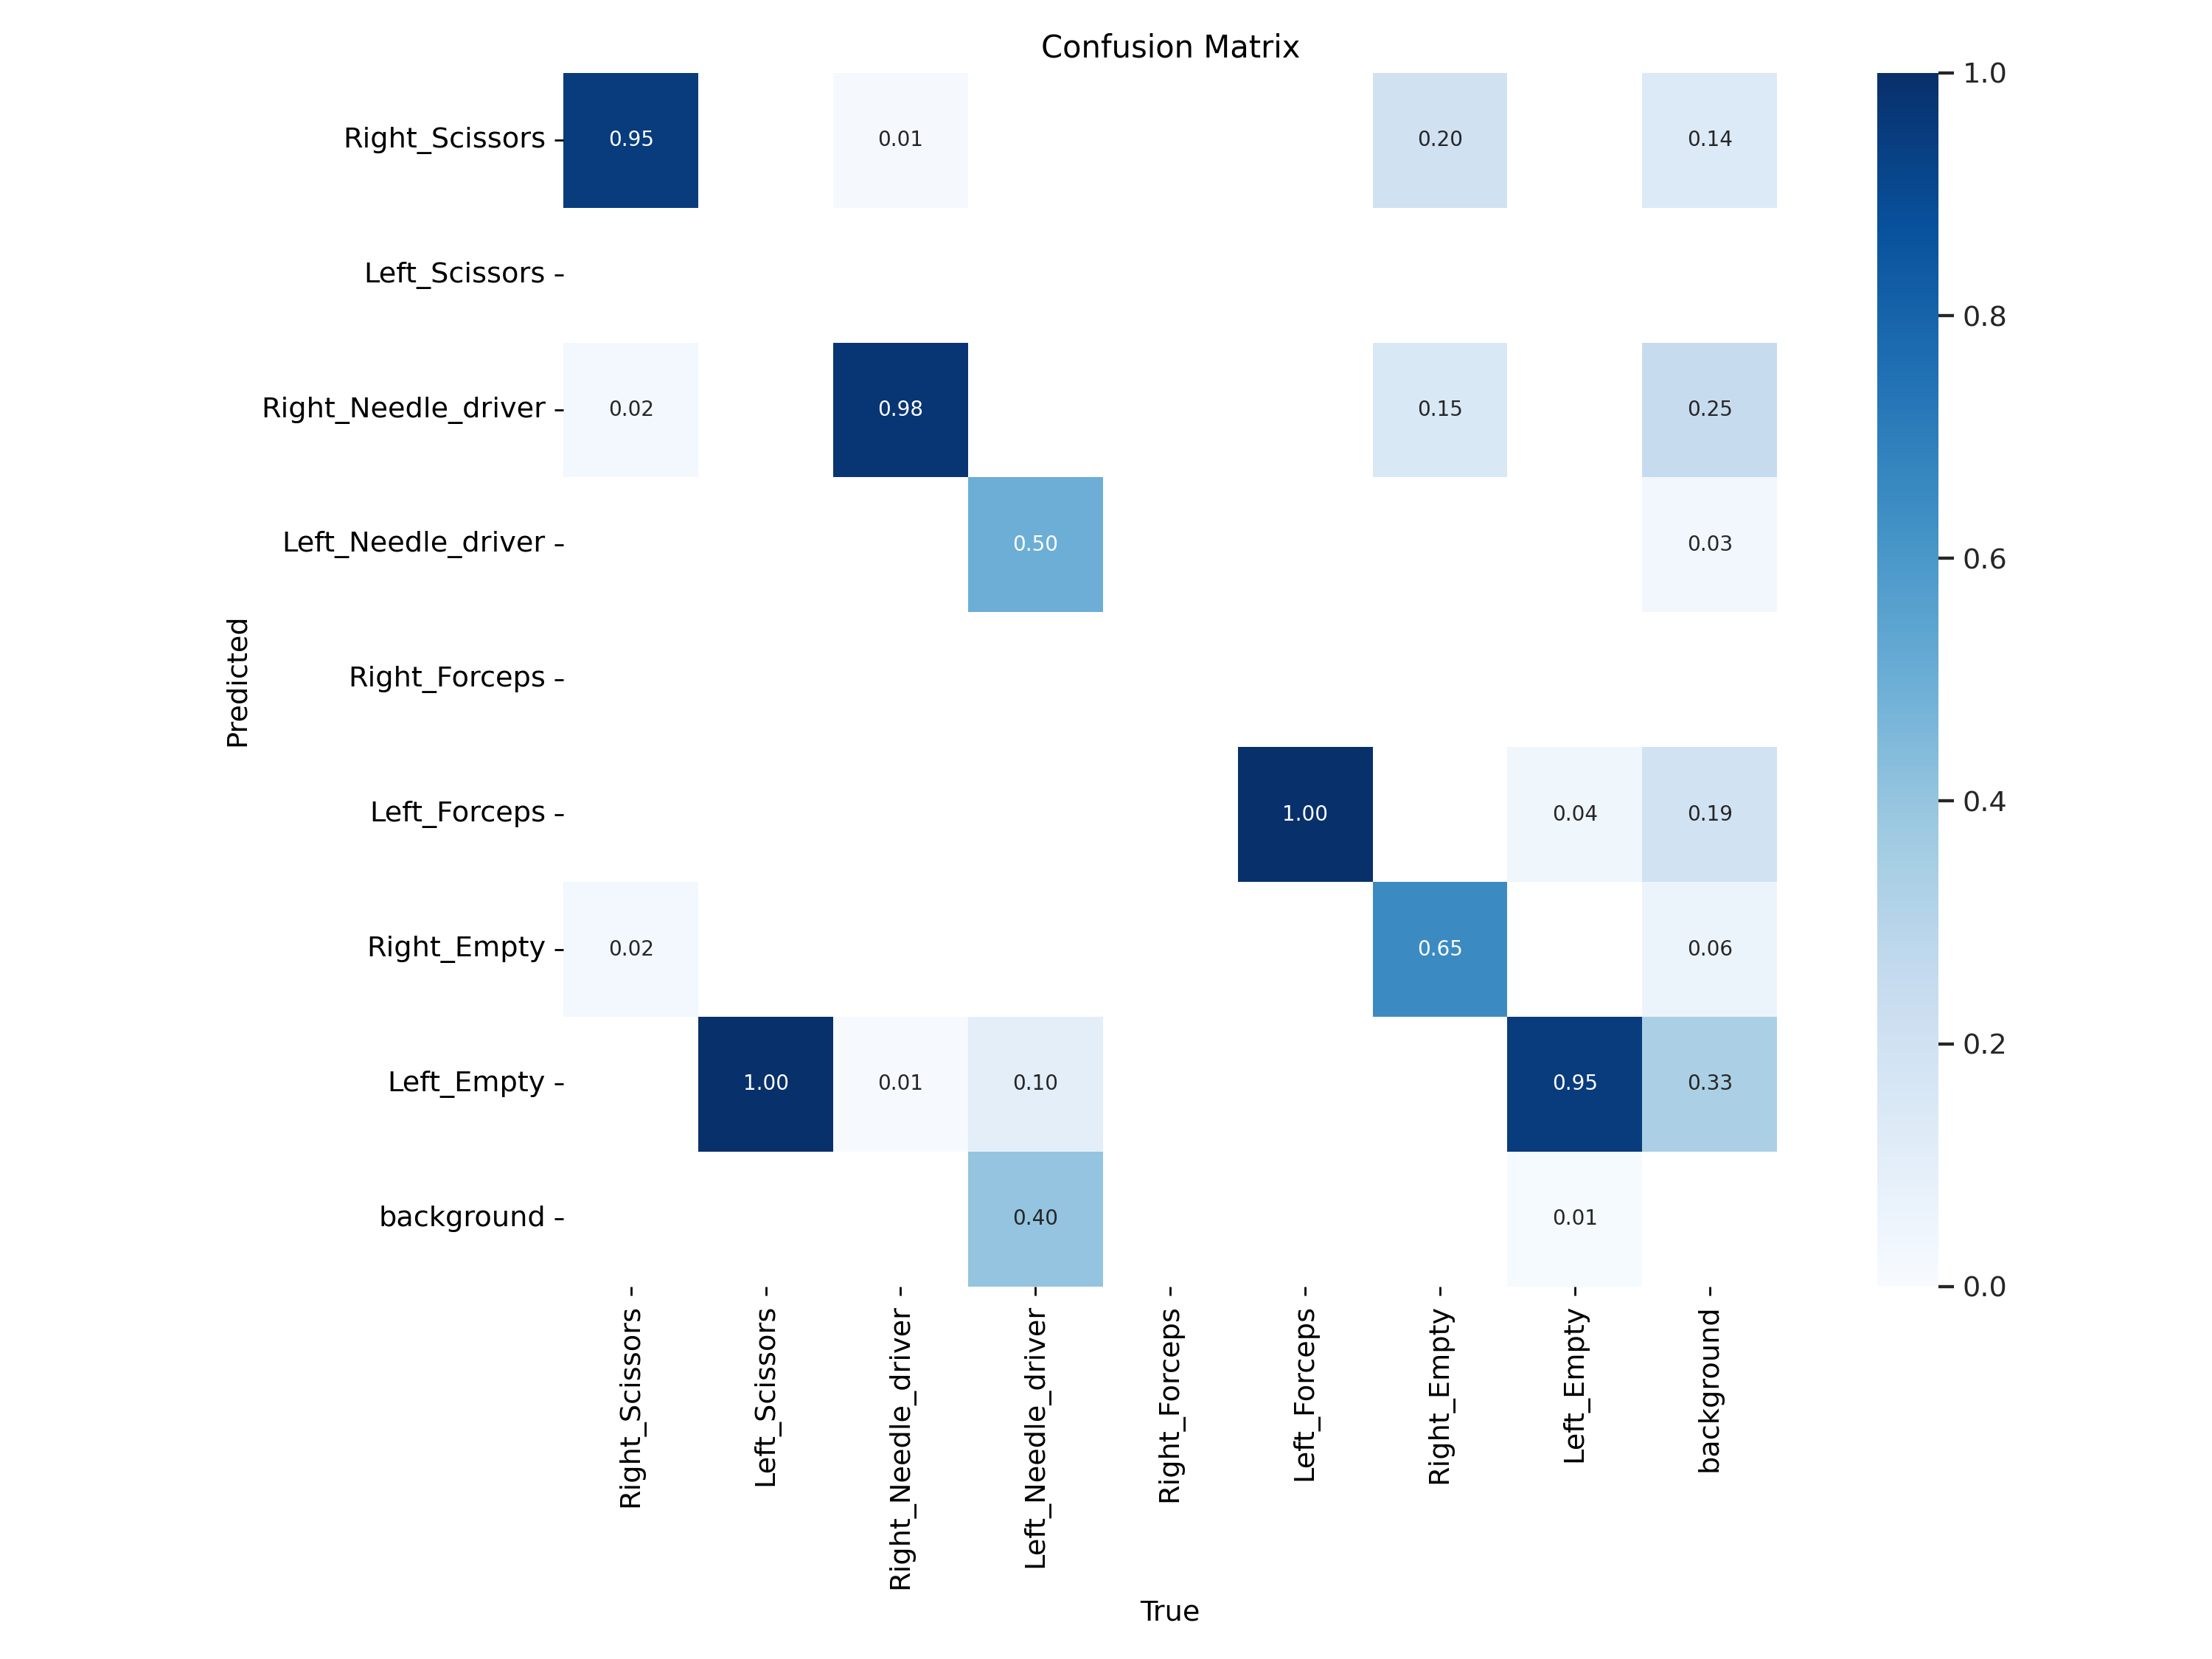

In [244]:
show_confusion_matrix(experiment_names[3])

# Expreiment 4
### Using Large Model And SGD Optimizer

In [203]:
df_exp4 = load_df(experiment_names[4], 'train')

In [105]:
df_exp4

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.079637,0.045156,0.054002,0.72006,0.15261,0.11969,0.040113,0.052566,0.025670,0.039783,0.070303,0.003300,0.003300
1,1,0.061682,0.029913,0.041771,0.95319,0.10331,0.22108,0.096761,0.057354,0.013435,0.033801,0.040237,0.006567,0.006567
2,2,0.058817,0.024326,0.036769,0.81308,0.29176,0.32091,0.152760,0.041494,0.012236,0.033126,0.010106,0.009769,0.009769
3,3,0.052750,0.020669,0.033951,0.60953,0.49505,0.34952,0.160320,0.042003,0.010581,0.027336,0.009703,0.009703,0.009703
4,4,0.042883,0.019044,0.030816,0.55480,0.53868,0.35760,0.236390,0.034880,0.009982,0.024073,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.008722,0.007697,0.001638,0.87626,0.87727,0.90405,0.818250,0.008894,0.006085,0.011960,0.000694,0.000694,0.000694
96,96,0.008664,0.007784,0.001567,0.89734,0.85625,0.90072,0.813740,0.008816,0.006142,0.012312,0.000595,0.000595,0.000595
97,97,0.009058,0.007945,0.001561,0.84364,0.91182,0.90435,0.816990,0.008958,0.006158,0.012437,0.000496,0.000496,0.000496
98,98,0.009061,0.007910,0.002034,0.87049,0.91827,0.90539,0.826540,0.008870,0.006152,0.011775,0.000397,0.000397,0.000397


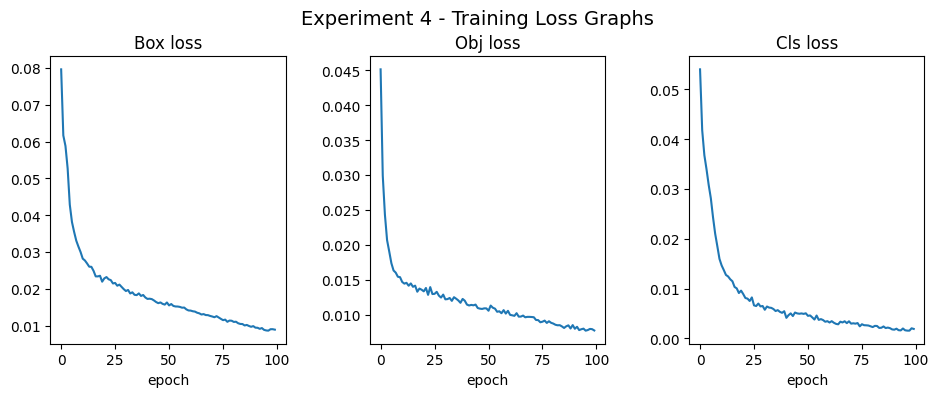

In [106]:
plot_exp_loss_graphs(df_exp4, 4, 'train')

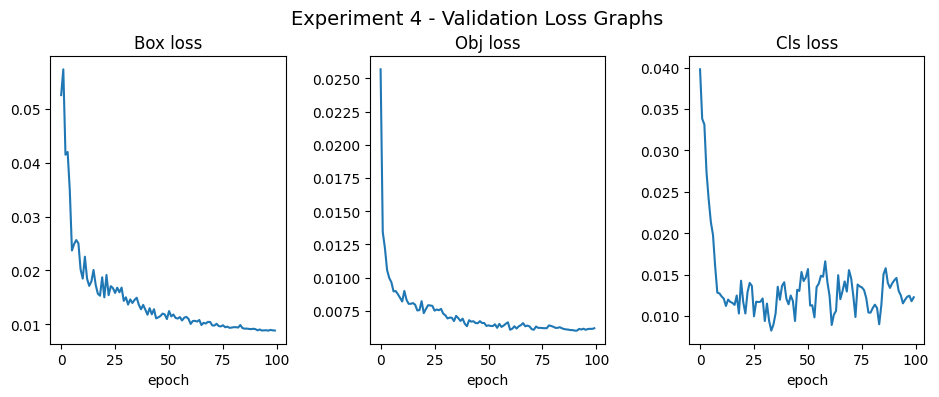

In [107]:
plot_exp_loss_graphs(df_exp4, 4, 'val')

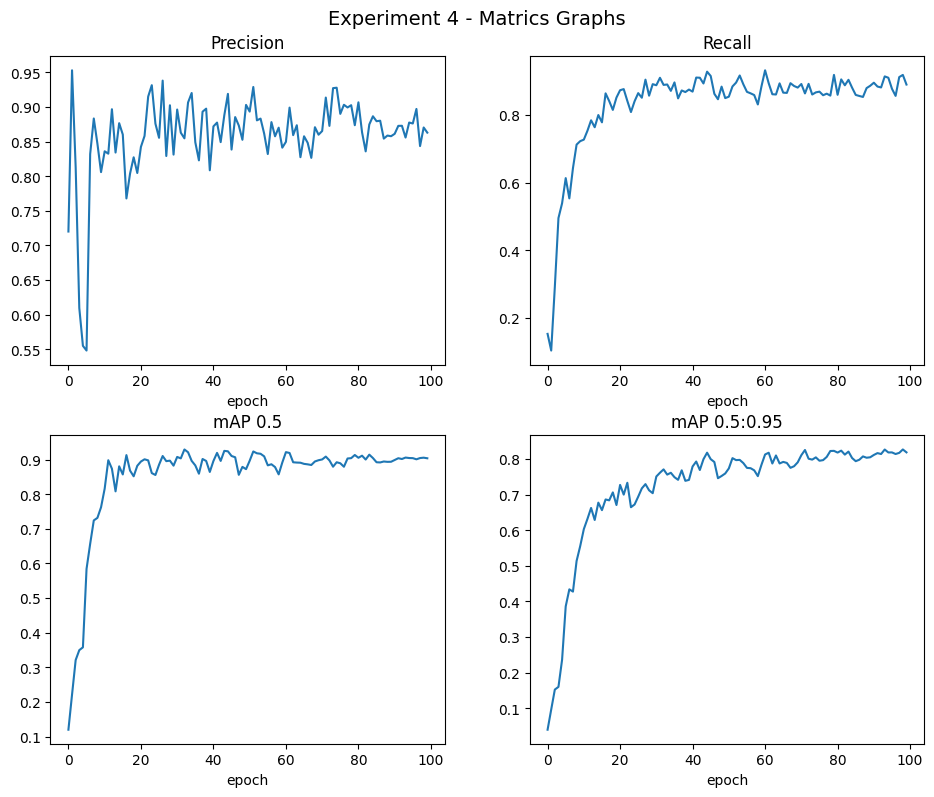

In [108]:
plot_exp_matrics_graphs(df_exp4, 4)

In [213]:
df_test4 = load_df(experiment_names[4], 'val')
df_test4

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.938,0.700,0.718,0.644000
1,Right Scissors,199,42,0.931,0.960,0.955,0.855000
2,Left Scissors,199,1,1.000,0.000,0.003,0.000302
3,Right Needle driver,199,137,0.944,0.985,0.987,0.945000
4,Left Needle driver,199,10,0.904,0.500,0.498,0.378000
5,Left Forceps,199,62,0.927,0.984,0.981,0.880000
6,Right Empty,199,20,0.913,0.528,0.634,0.548000
7,Left Empty,199,126,0.944,0.943,0.969,0.903000


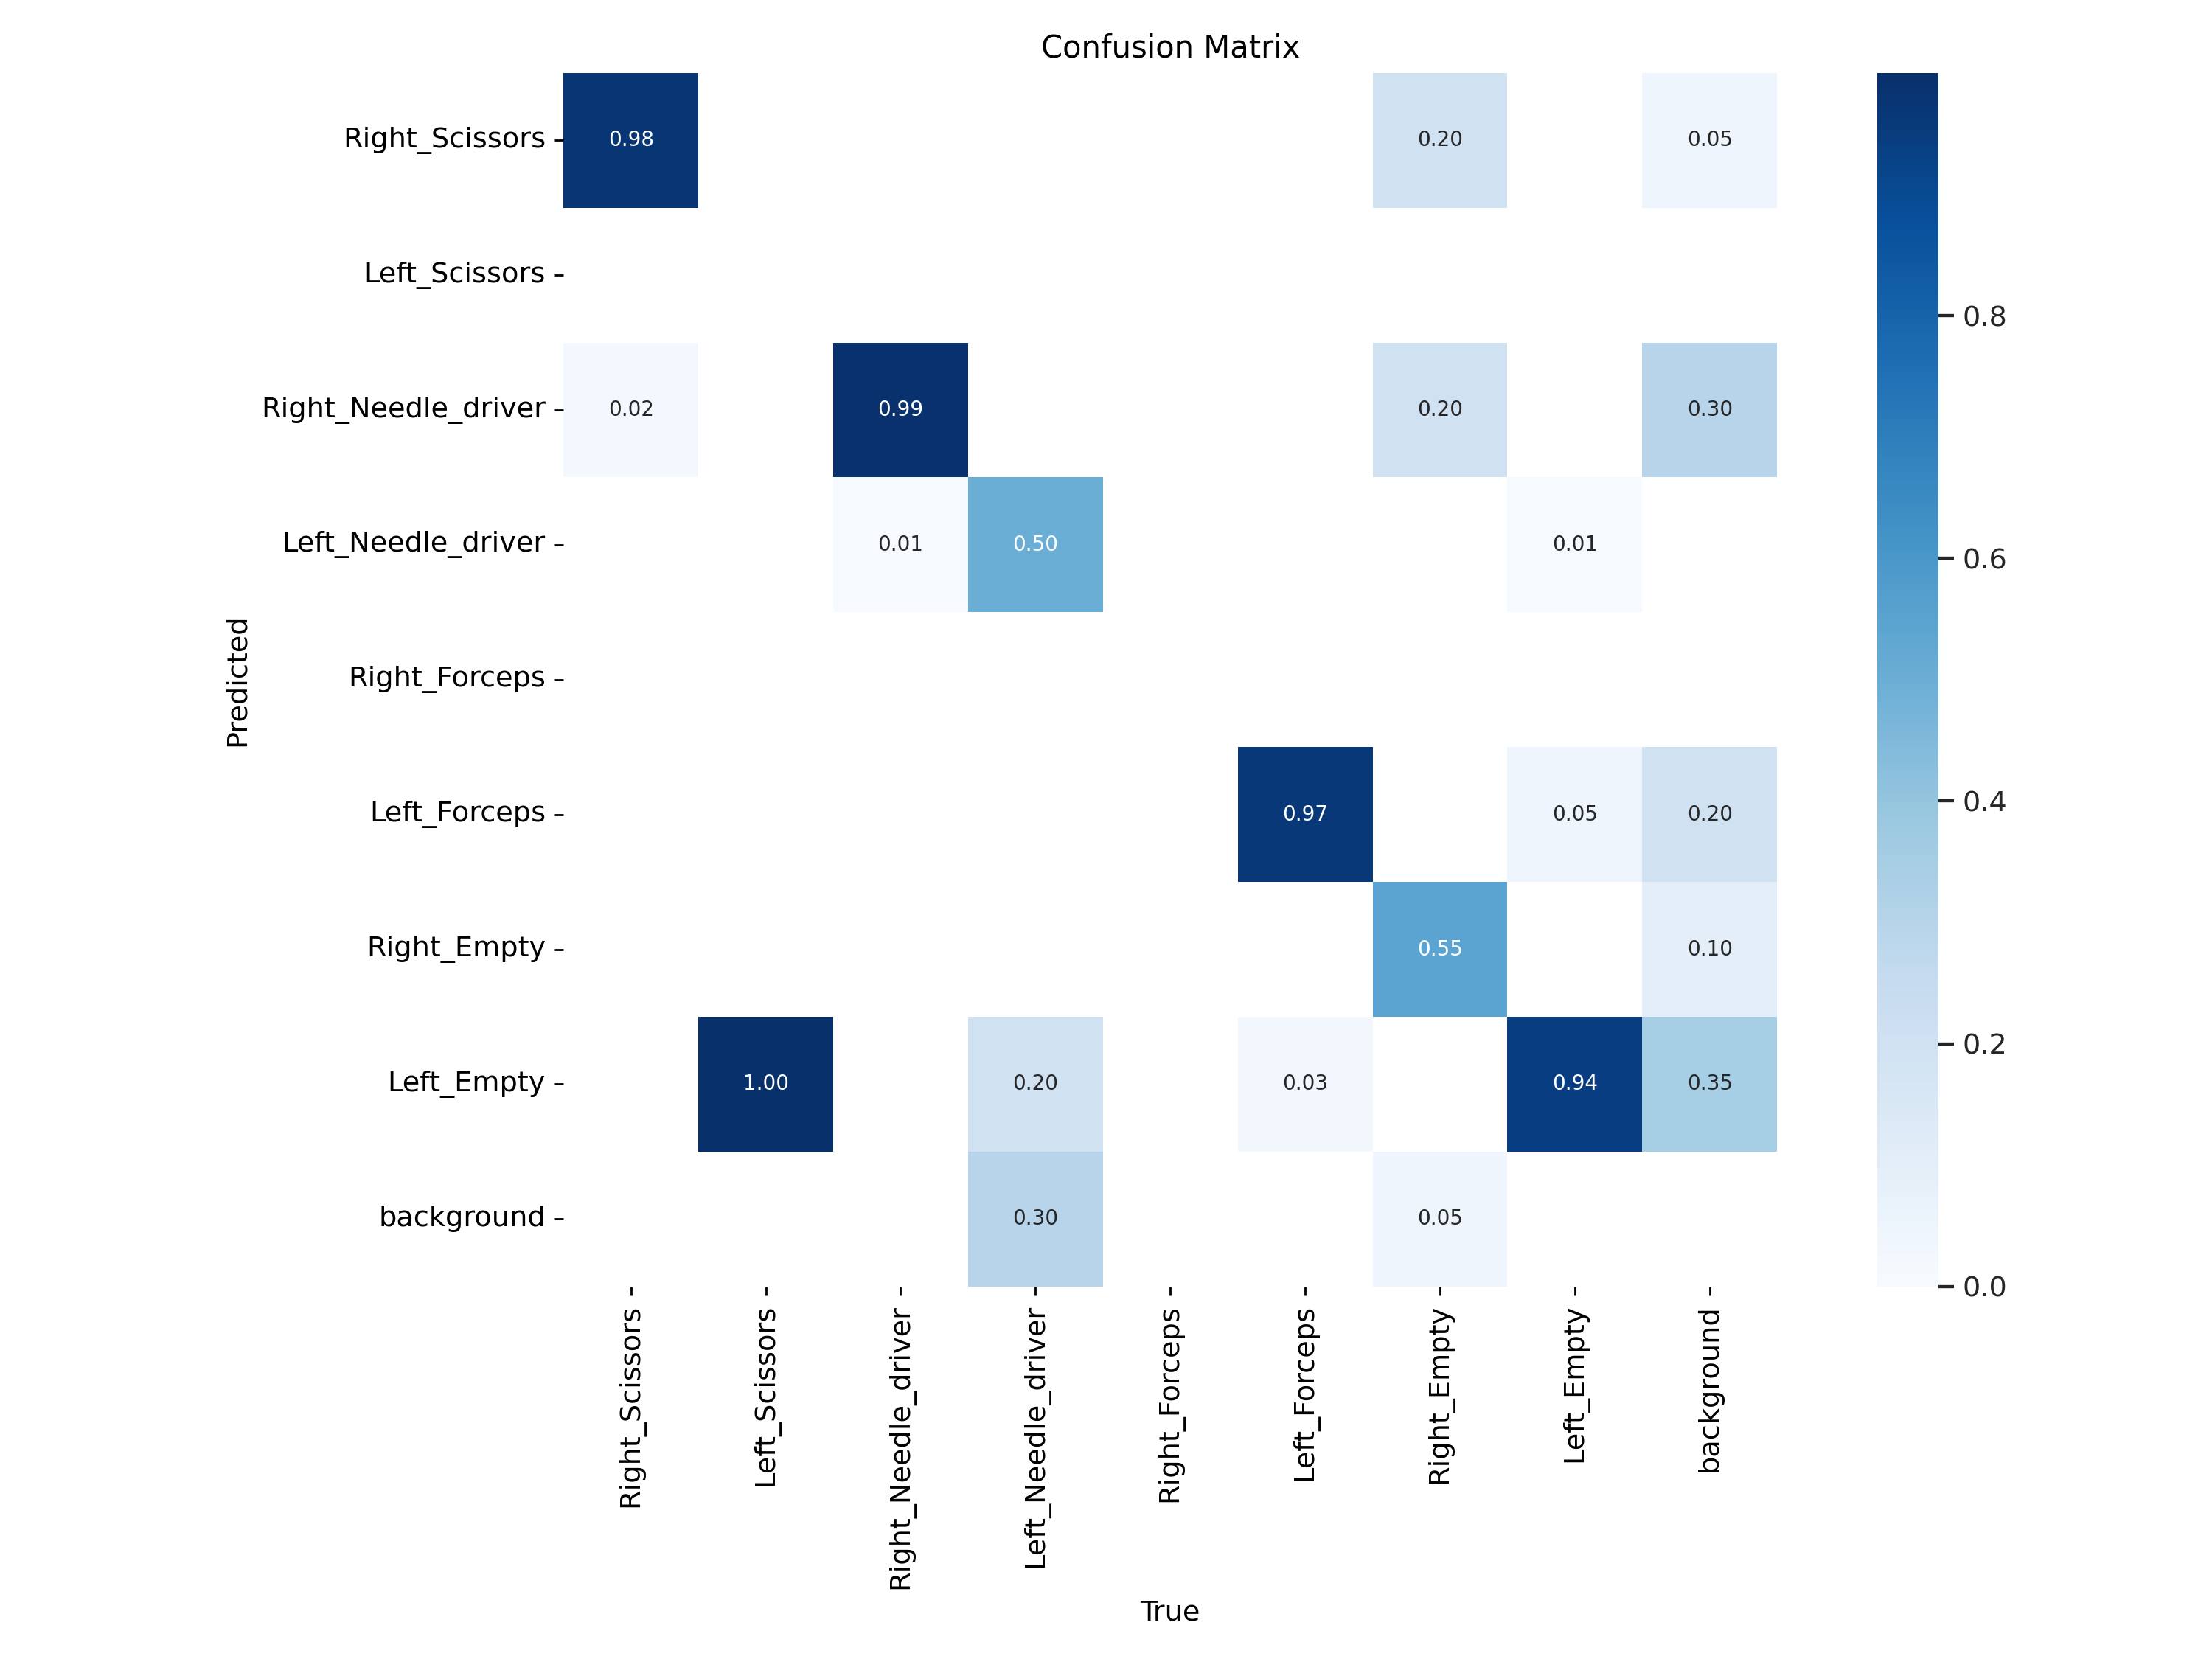

In [245]:
show_confusion_matrix(experiment_names[4])

# Expreiment 5
### Using small Model And Data Augmentation

In [204]:
df_exp5 = load_df(experiment_names[5], 'train')

In [110]:
df_exp5

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.077241,0.040743,0.058538,0.16172,0.33349,0.075344,0.031990,0.050538,0.020591,0.052642,0.070303,0.003300,0.003300
1,1,0.052674,0.027932,0.052712,0.59591,0.30440,0.184140,0.079965,0.043574,0.013335,0.050119,0.040237,0.006567,0.006567
2,2,0.048625,0.022718,0.050730,0.65729,0.30486,0.251540,0.125420,0.045626,0.013635,0.046847,0.010106,0.009769,0.009769
3,3,0.041325,0.019637,0.047457,0.17806,0.63815,0.289500,0.149670,0.029373,0.010753,0.043741,0.009703,0.009703,0.009703
4,4,0.034882,0.017902,0.044015,0.57254,0.53024,0.394920,0.267910,0.022386,0.009721,0.040679,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.008986,0.008016,0.027148,0.46398,0.91746,0.503390,0.450170,0.009703,0.006705,0.035660,0.000694,0.000694,0.000694
96,96,0.009134,0.008371,0.027162,0.46653,0.91665,0.512450,0.459070,0.009706,0.006774,0.035286,0.000595,0.000595,0.000595
97,97,0.009102,0.008204,0.027244,0.46786,0.91640,0.510100,0.457750,0.009738,0.006815,0.035004,0.000496,0.000496,0.000496
98,98,0.008905,0.008124,0.027113,0.46654,0.91641,0.508780,0.456100,0.009738,0.006867,0.035164,0.000397,0.000397,0.000397


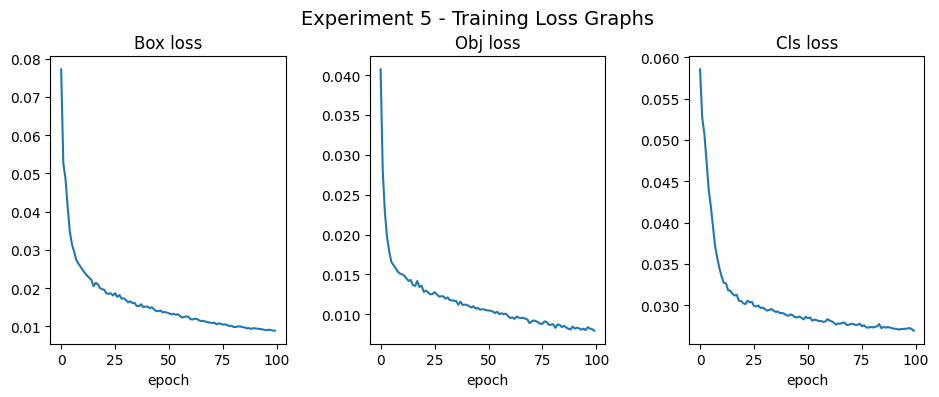

In [111]:
plot_exp_loss_graphs(df_exp5, 5, 'train')

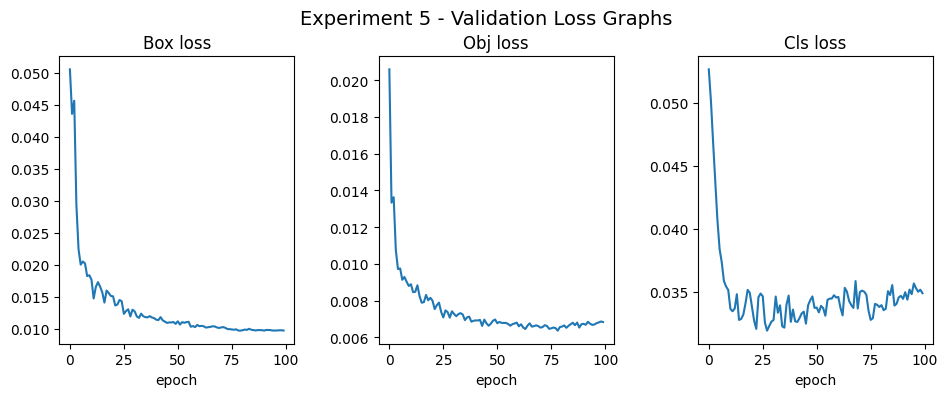

In [112]:
plot_exp_loss_graphs(df_exp5, 5, 'val')

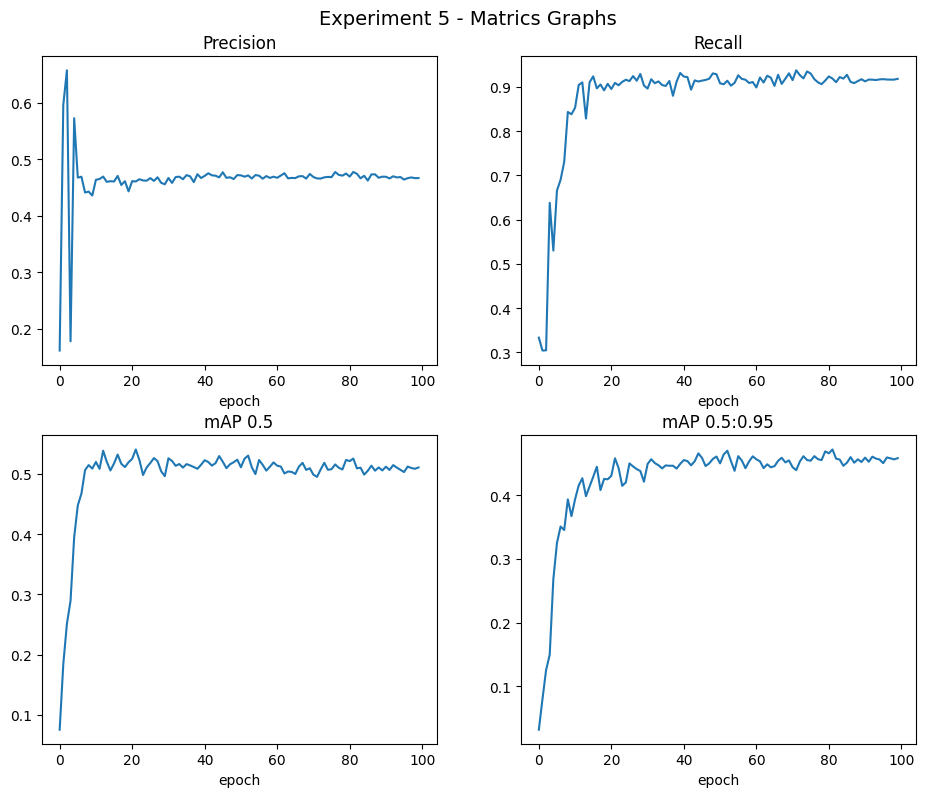

In [113]:
plot_exp_matrics_graphs(df_exp5, 5)

In [210]:
df_test5 = load_df(experiment_names[5], 'val')
df_test5

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.527769,0.700229,0.540687,0.474180
1,Right Scissors,199,42,0.888676,0.976190,0.888882,0.769743
2,Left Scissors,199,1,0.000000,0.000000,0.002803,0.000280
3,Right Needle driver,199,137,0.915494,0.978102,0.959105,0.865992
4,Left Needle driver,199,10,0.034147,0.500000,0.034504,0.013702
5,Left Forceps,199,62,0.938894,0.935484,0.955846,0.825730
6,Right Empty,199,20,0.076688,0.550000,0.069095,0.055437
7,Left Empty,199,126,0.840487,0.961824,0.874573,0.788374


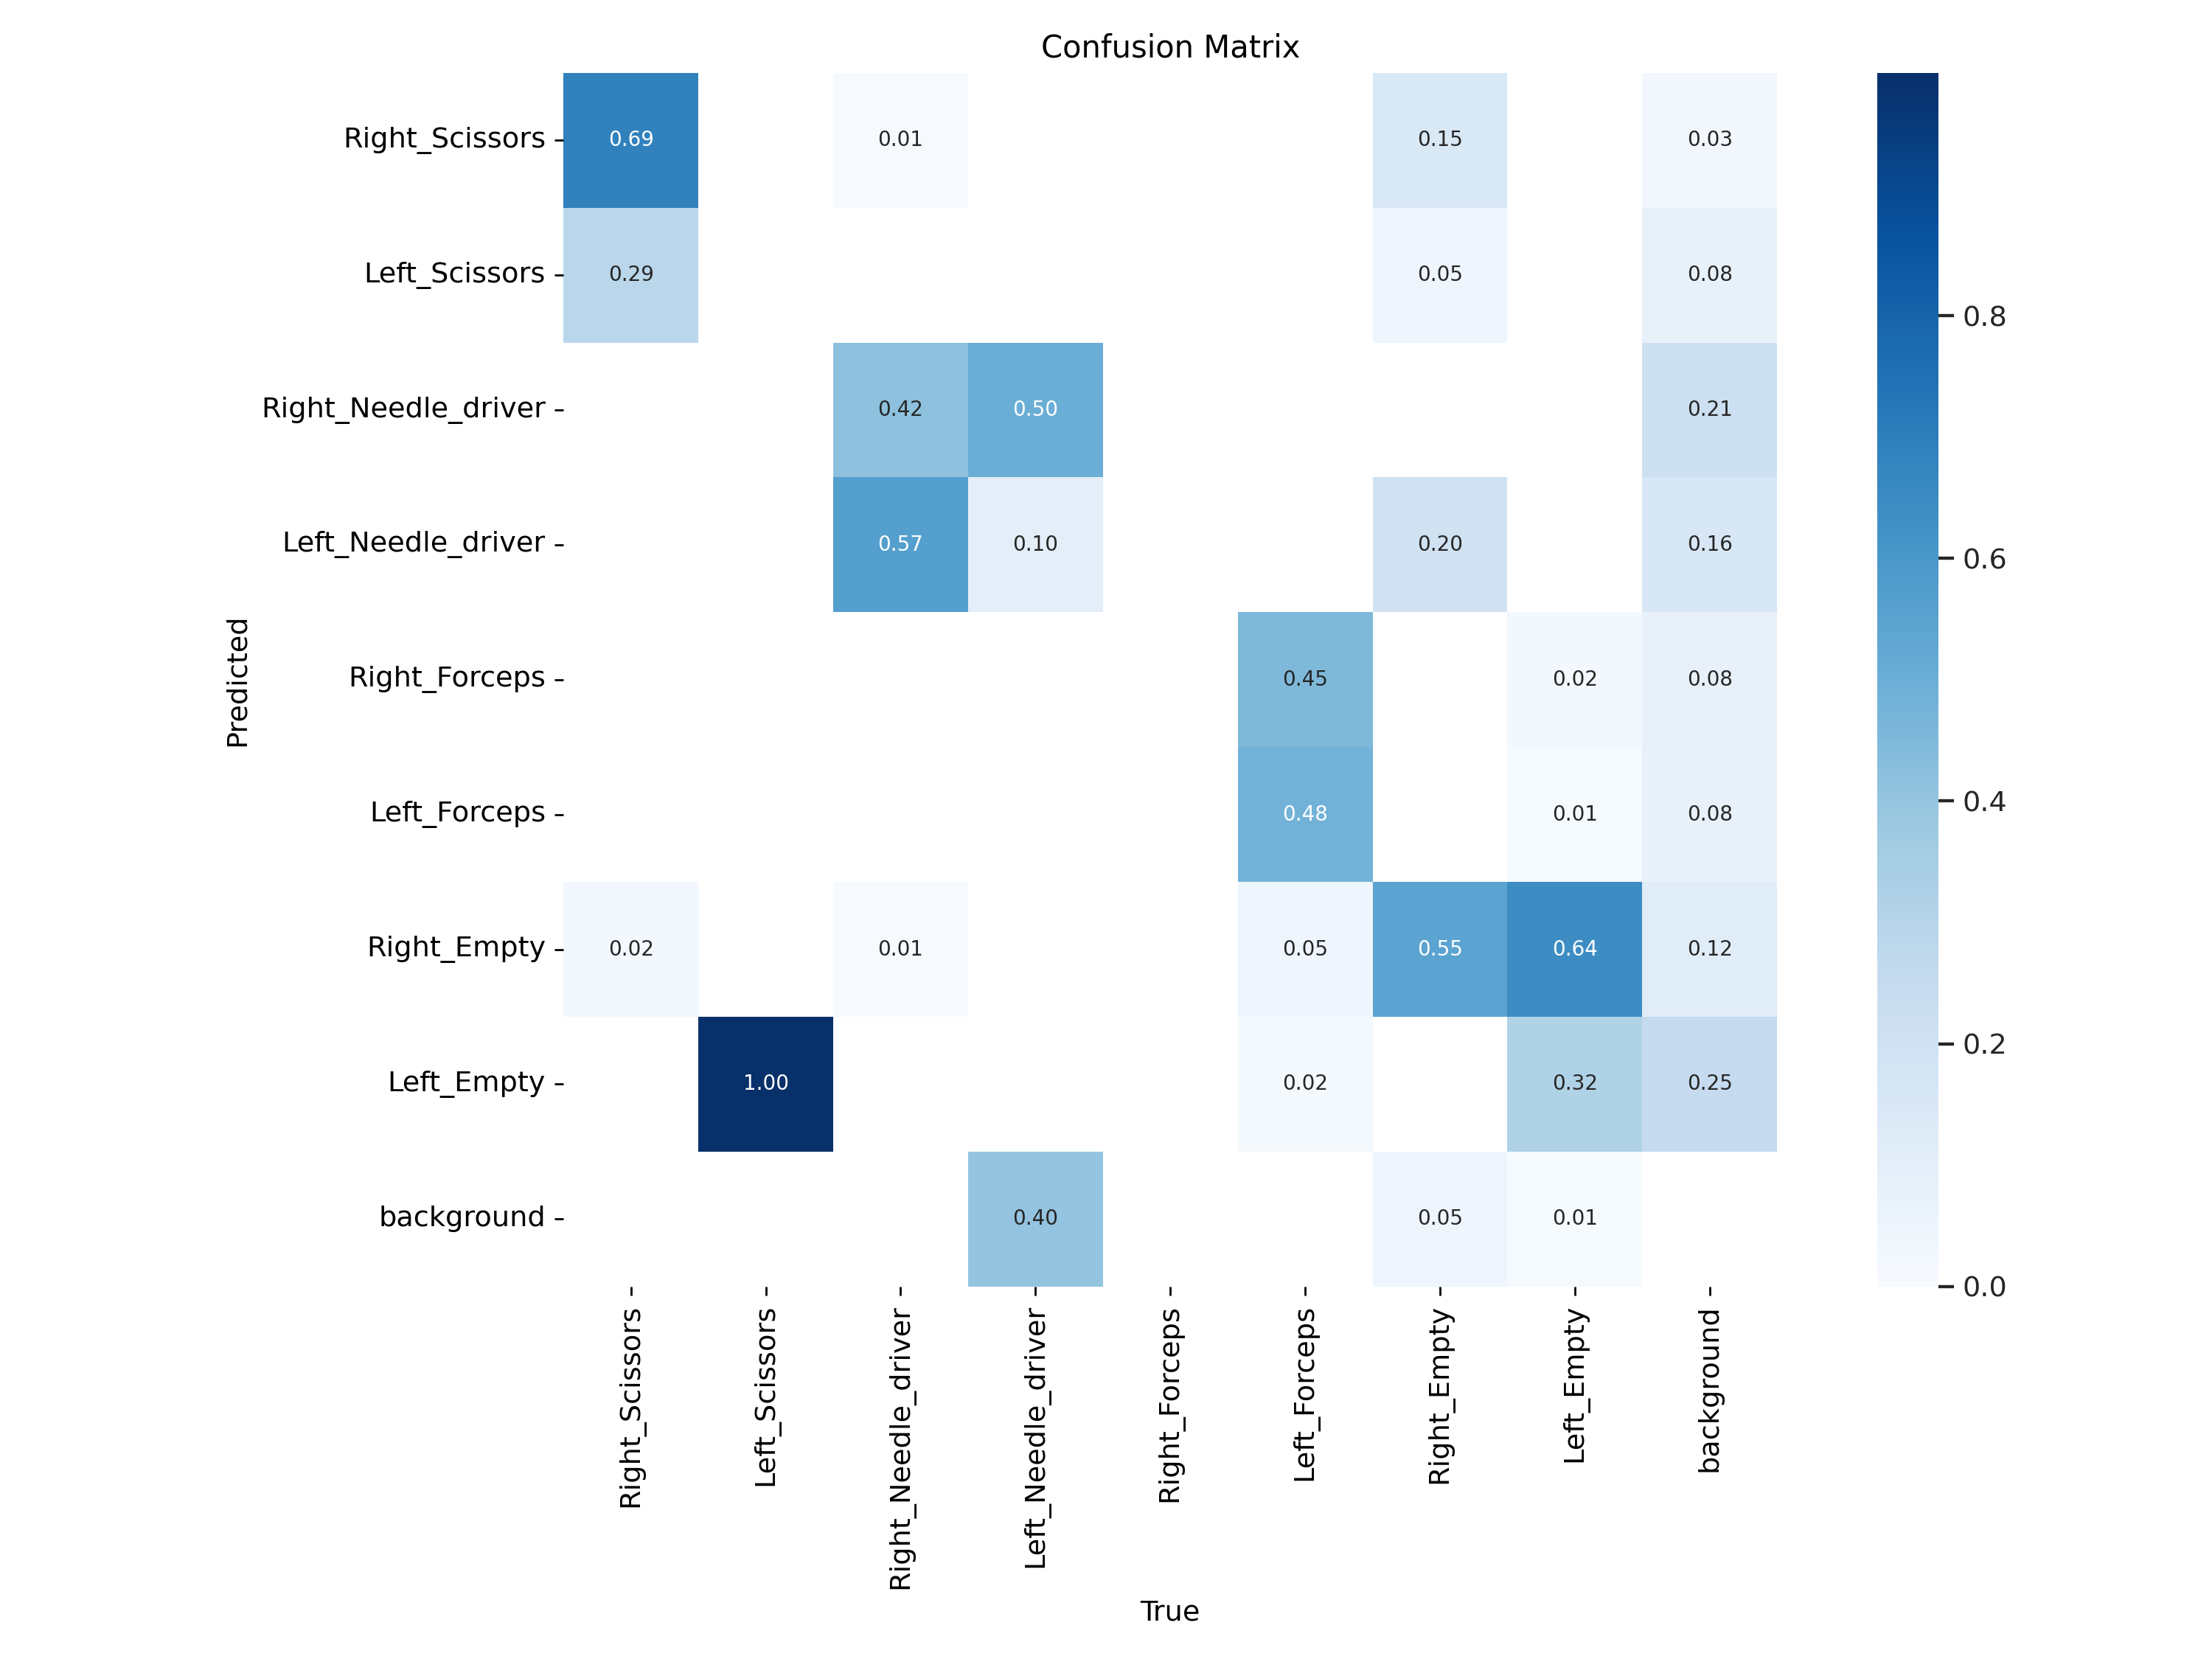

In [246]:
show_confusion_matrix(experiment_names[5])

# Expreiment 6
### Using large Model And Data Augmentation

In [205]:
df_exp6 = load_df(experiment_names[6], 'train')

In [115]:
df_exp6

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.069323,0.040647,0.056212,0.61399,0.35030,0.16823,0.063680,0.042807,0.016408,0.049282,0.070152,0.003317,0.003317
1,1,0.050656,0.024489,0.050209,0.62033,0.42338,0.22867,0.098513,0.040692,0.011720,0.045695,0.040086,0.006584,0.006584
2,2,0.044480,0.019769,0.046902,0.64696,0.35598,0.23998,0.126630,0.034823,0.010136,0.042820,0.009954,0.009786,0.009786
3,3,0.038803,0.017153,0.044361,0.23639,0.71045,0.32917,0.189270,0.027870,0.009808,0.039162,0.009703,0.009703,0.009703
4,4,0.032974,0.015982,0.041618,0.40164,0.64838,0.45449,0.287970,0.025347,0.009426,0.038098,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,0.009452,0.007811,0.027271,0.46369,0.93012,0.51195,0.461720,0.009445,0.006703,0.033029,0.003367,0.003367,0.003367
69,69,0.009095,0.007499,0.027325,0.46630,0.91857,0.50044,0.452310,0.009561,0.006804,0.032049,0.003268,0.003268,0.003268
70,70,0.009372,0.007634,0.027336,0.46377,0.92646,0.49475,0.446020,0.009601,0.006446,0.033762,0.003169,0.003169,0.003169
71,71,0.009204,0.007690,0.027247,0.46350,0.92092,0.50057,0.452740,0.009465,0.006597,0.033507,0.003070,0.003070,0.003070


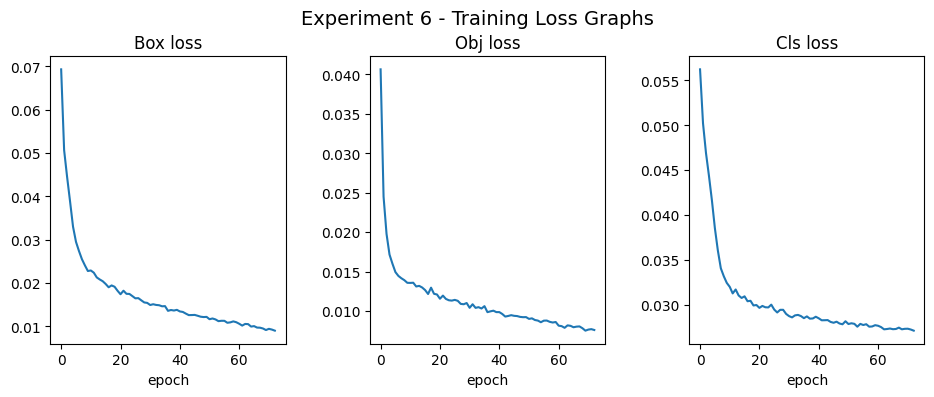

In [116]:
plot_exp_loss_graphs(df_exp6, 6, 'train')

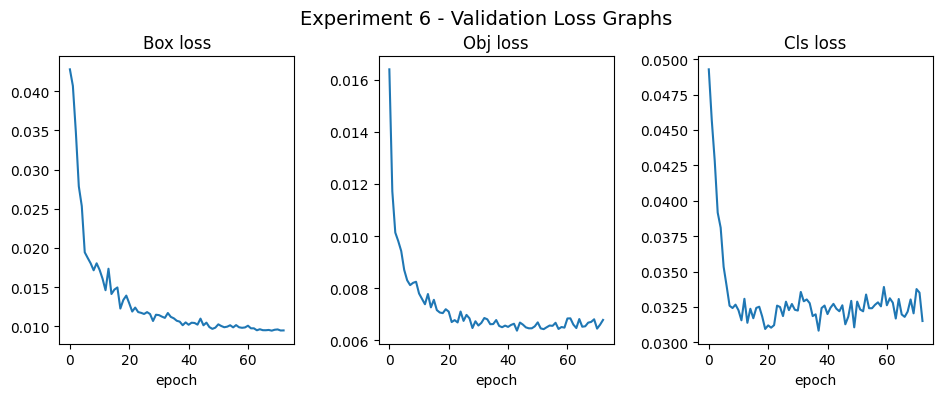

In [117]:
plot_exp_loss_graphs(df_exp6, 6, 'val')

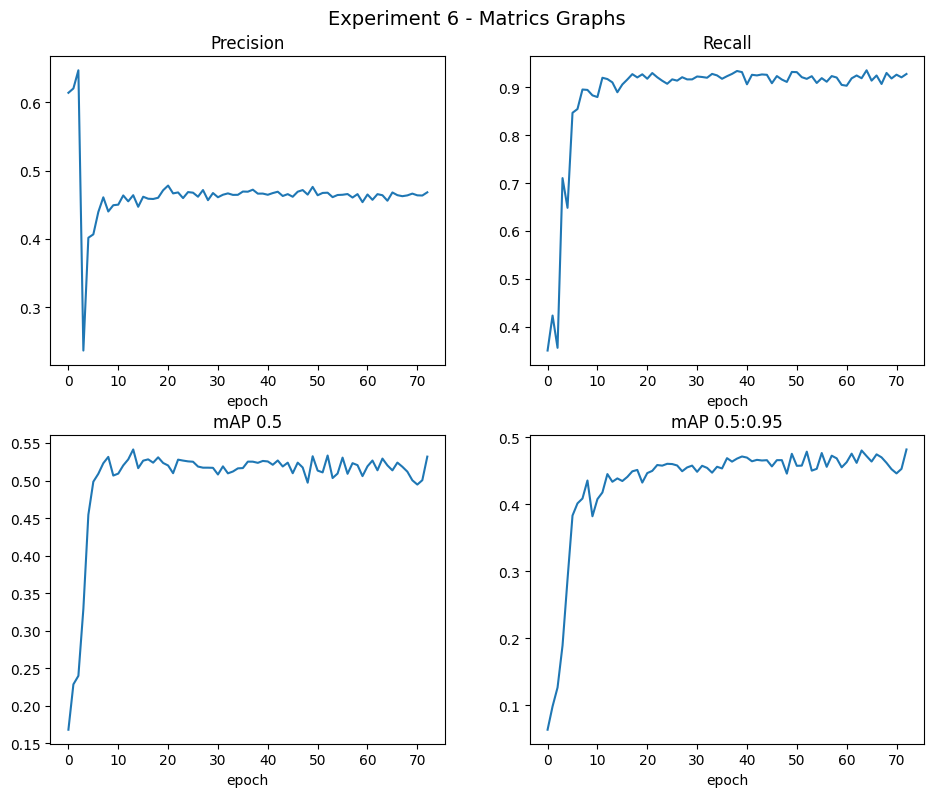

In [118]:
plot_exp_matrics_graphs(df_exp6, 6)

In [211]:
df_test6 = load_df(experiment_names[6], 'val')
df_test6

,Class,Images,Instances,Precision,Recall,mAP50,mAP50-95
0,all,199,398,0.509732,0.713157,0.548586,0.489633
1,Right Scissors,199,42,0.841370,0.976190,0.929305,0.815128
2,Left Scissors,199,1,0.000000,0.000000,0.003887,0.000389
3,Right Needle driver,199,137,0.894298,0.988105,0.943557,0.875273
4,Left Needle driver,199,10,0.033032,0.500000,0.026013,0.014838
5,Left Forceps,199,62,0.923886,0.951613,0.959160,0.838142
6,Right Empty,199,20,0.077760,0.600000,0.084034,0.067332
7,Left Empty,199,126,0.797778,0.976190,0.894144,0.816324


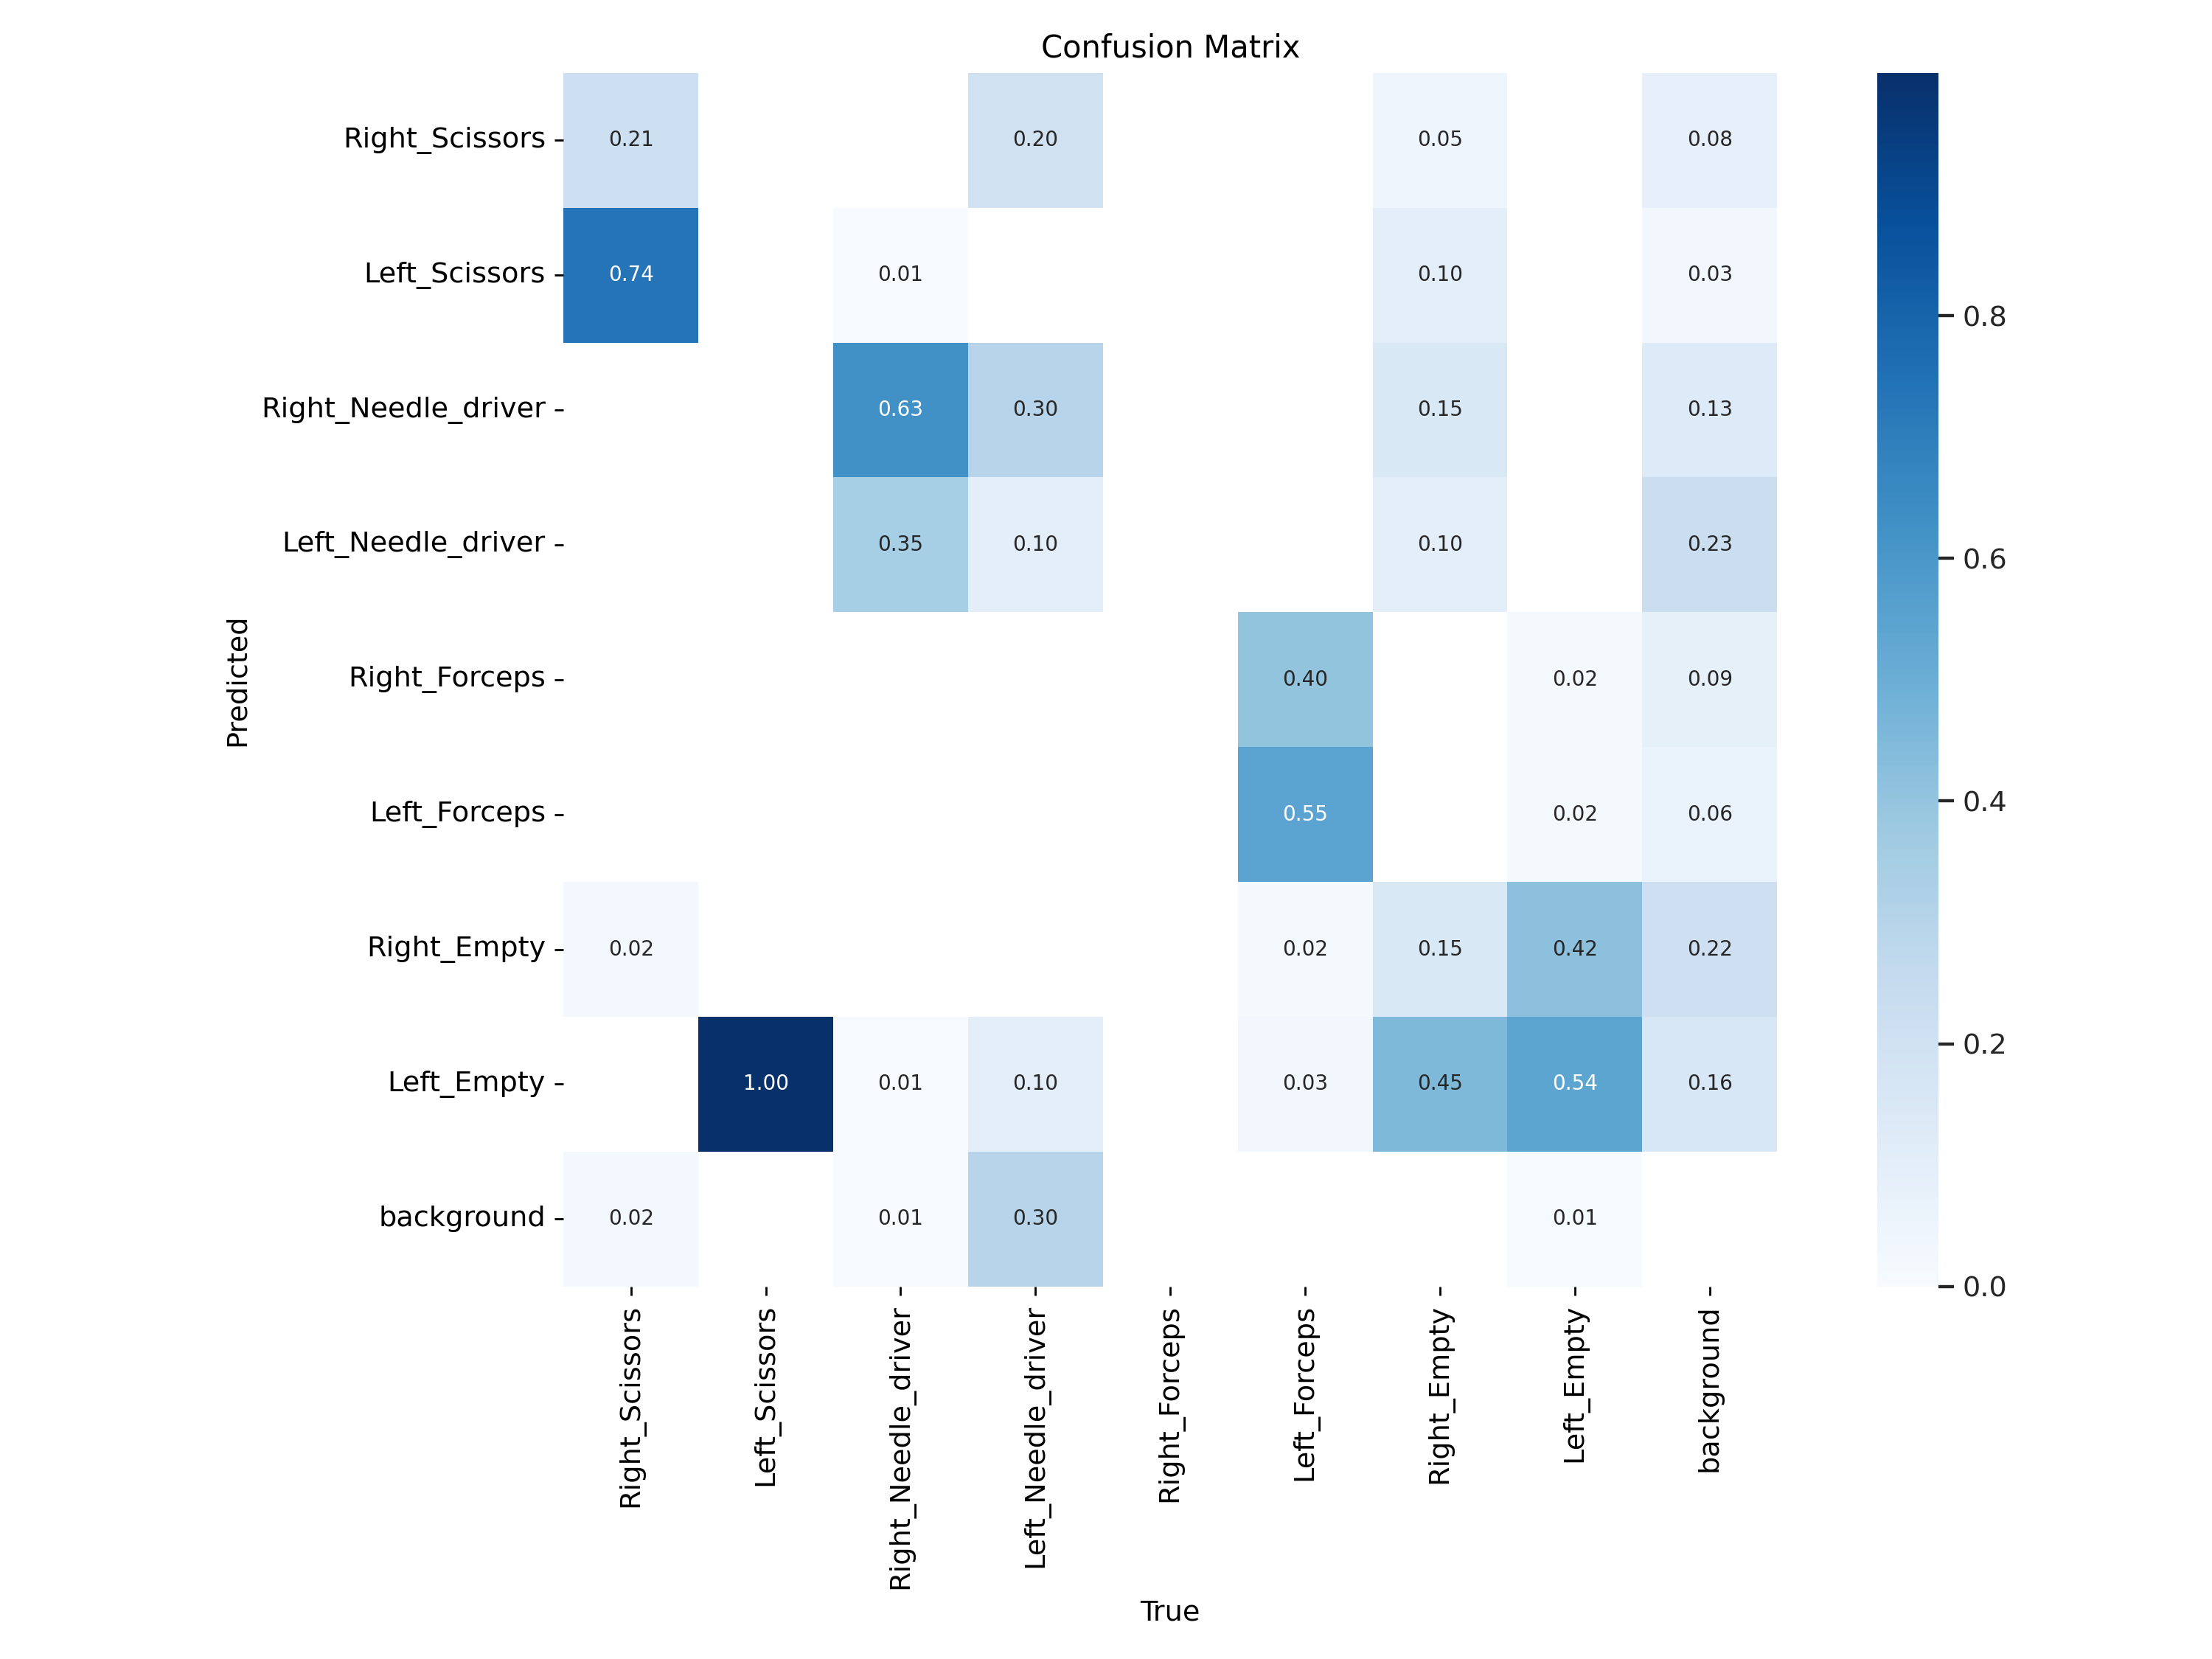

In [247]:
show_confusion_matrix(experiment_names[6])

# All Experiments

In [154]:
all_dfs = [df_exp1, df_exp2, df_exp3, df_exp4, df_exp5, df_exp6]

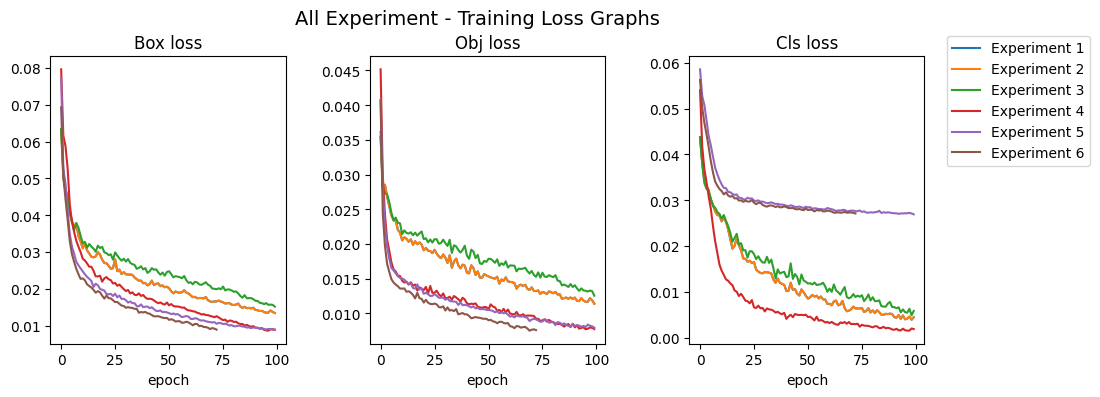

In [181]:
plot_all_loss_graphs(all_dfs, 'train')

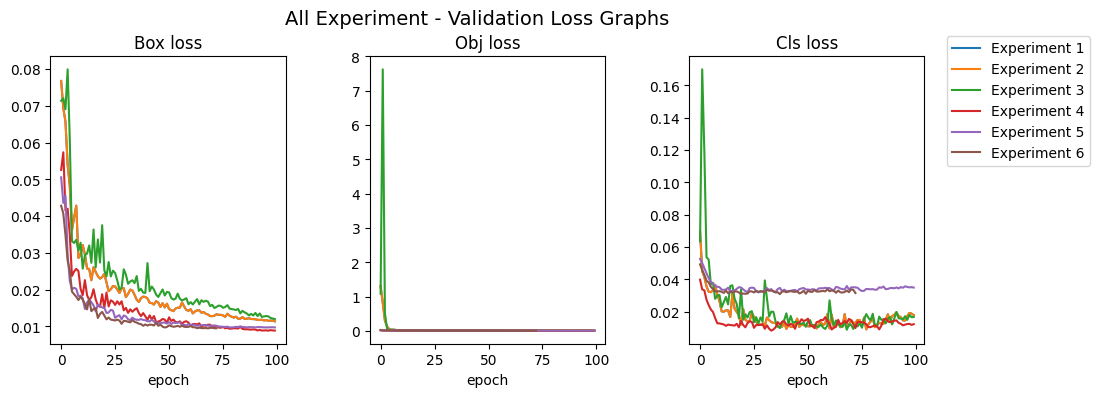

In [180]:
plot_all_loss_graphs(all_dfs, 'val')

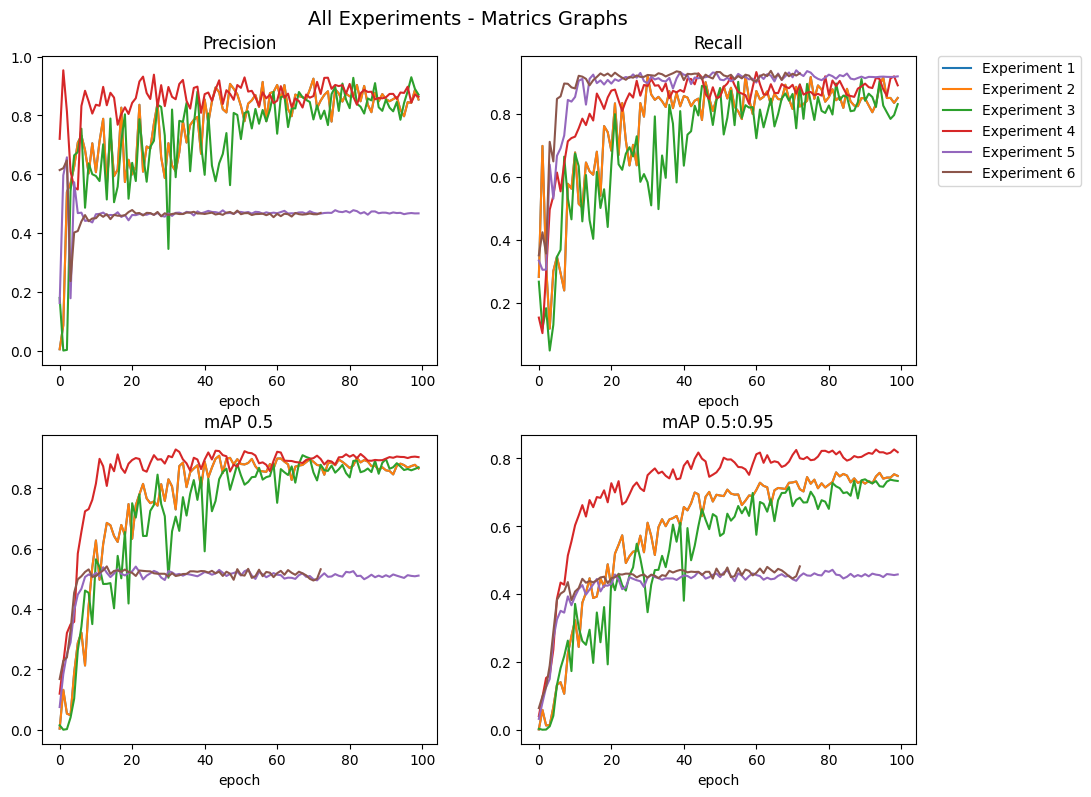

In [230]:
plot_all_matrics_graphs(all_dfs)

In [220]:
all_test_dfs = [df_test1, df_test2, df_test3, df_test4, df_test5, df_test6]

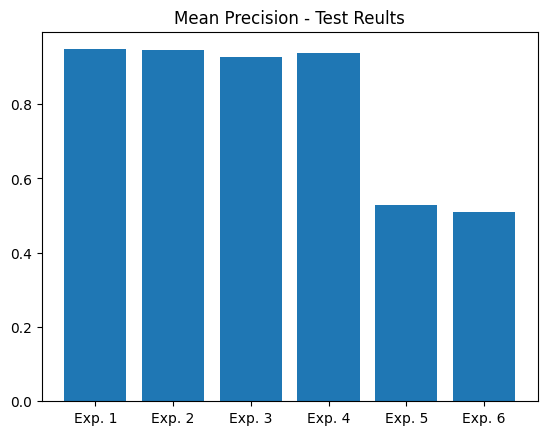

In [236]:
plot_tests_metric(all_test_dfs, 'Precision')

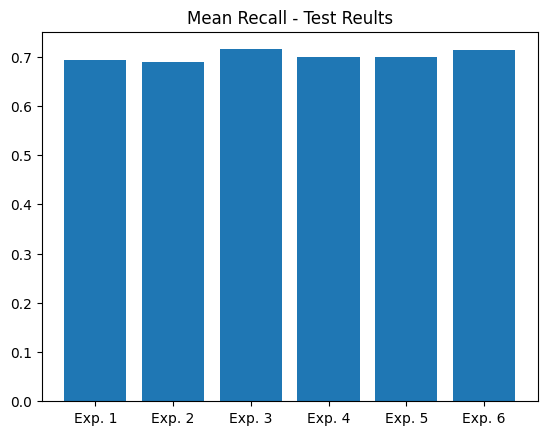

In [237]:
plot_tests_metric(all_test_dfs, 'Recall')

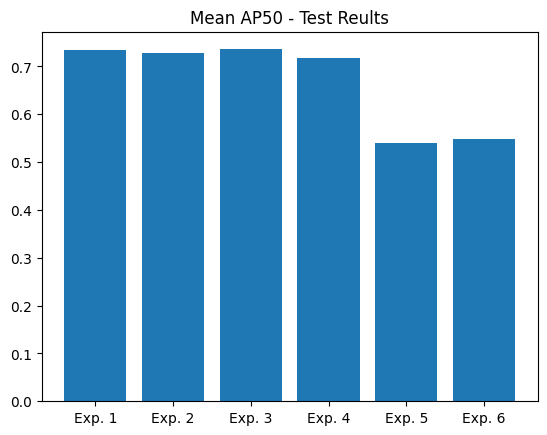

In [238]:
plot_tests_metric(all_test_dfs, 'mAP50')

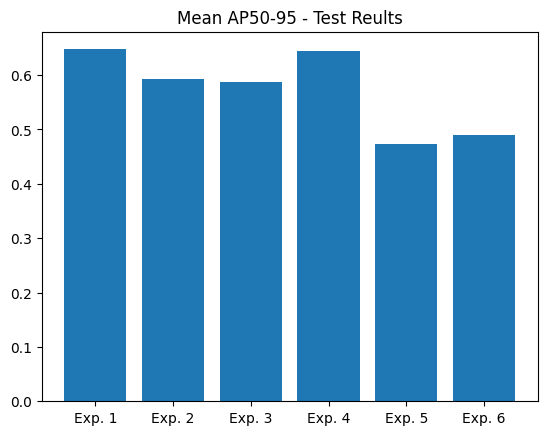

In [239]:
plot_tests_metric(all_test_dfs, 'mAP50-95')